In [151]:
import pandas as pd
import ast # import abstract syntax tree. it will helps the data into real python objects
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,make_scorer
import datetime
import sklearn
import joblib
import pickle
import openpyxl

In [2]:
# Load your Excel file
input_data = "C:/Users/SG_LENOVO/Downloads/bangalore_cars.xlsx"
output_data = "C:/Users/SG_LENOVO/Downloads/bangalore_structured.csv"


In [3]:
df=pd.read_excel(input_data)

In [4]:
df.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [5]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened dadfbta into a single DataFrame
bangalore_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
bangalore_structured["City"] = "Bangalore"

# Save the dataframe to a csv file
bangalore_structured.to_csv(output_data, index=False)

print(bangalore_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback  1,20,000       Manual        3  3rd Owner   
1      0  Petrol        SUV    32,706       Manual        2  2nd Owner   
2      0  Petrol  Hatchback    11,949       Manual        1  1st Owner   
3      0  Petrol      Sedan    17,794       Manual        1  1st Owner   
4      0  Diesel        SUV    60,000       Manual        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1476   0  Diesel        SUV  1,56,039       Manual        2  2nd Owner   
1477   0  Petrol      Sedan    56,000       Manual        2  2nd Owner   
1478   0  Petrol  Hatchback    42,000       Manual        2  2nd Owner   
1479   0  Diesel  Hatchback    93,003       Manual        1  1st Owner   
1480   0  Petrol  Hatchback    36,000    Automatic        2  2nd Owner   

          oem               model  modelYear  ...  data_2_list_11_value  \
0      Maruti      Maruti Celerio   

In [6]:
bangalore_structured.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_11_value,commonIcon,top_5_key,top_5_value,data_2_list_12_key,data_2_list_12_value,data_1_list_8_key,data_1_list_8_value,car_links,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,235-litres,,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,,Seats,5,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,5,,Seats,5,Cargo Volumn,242-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,4,,Seats,5,Cargo Volumn,407-litres,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,5,,Seats,5,Cargo Volumn,353-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore


In [7]:
# Chennai

In [8]:
# Load your Excel file
input_data = "C:/Users/SG_LENOVO/Downloads/chennai_cars.xlsx"
output_data = "C:/Users/SG_LENOVO/Downloads/chennai_structured.csv"


In [9]:
df=pd.read_excel(input_data)

In [10]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
Chennai_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
Chennai_structured["City"] = "Chennai"

# Save the dataframe to a csv file
Chennai_structured.to_csv(output_data, index=False)

print(Chennai_structured)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Petrol        SUV  20,000    Automatic        1  1st Owner   
1      0  Petrol   Minivans  20,687       Manual        1  1st Owner   
2      0  Petrol        SUV  30,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback  59,247       Manual        1  1st Owner   
4      0  Petrol  Hatchback  50,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1414   0  Petrol  Hatchback  42,891    Automatic        1  1st Owner   
1415   0  Diesel        SUV  59,100       Manual        1  1st Owner   
1416   0  Petrol        SUV  55,913    Automatic        1  1st Owner   
1417   0  Diesel        SUV  65,000    Automatic        1  1st Owner   
1418   0  Diesel      Sedan  60,000    Automatic        1  1st Owner   

             oem              model  modelYear  ...  top_5_key top_5_value  \
0            Kia          Kia Sonet       2022  ...      

In [11]:
Chennai_structured.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,top_5_key,top_5_value,data_2_list_12_key,data_2_list_12_value,data_0_list_12_key,data_0_list_12_value,data_1_list_8_key,data_1_list_8_value,car_links,City
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Chennai
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Chennai
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,...,Seats,5,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Chennai
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Chennai
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,...,Seats,5,Cargo Volumn,354-litres,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Chennai


In [12]:
#delhi

In [13]:
# Load your Excel file
input_data = "C:/Users/SG_LENOVO/Downloads/delhi_cars.xlsx"
output_data = "C:/Users/SG_LENOVO/Downloads/delhi_structured.csv"


In [14]:
df=pd.read_excel(input_data)

In [15]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
delhi_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
delhi_structured["City"] = "Delhi"

# Save the dataframe to a csv file
delhi_structured.to_csv(output_data, index=False)

print(delhi_structured)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Diesel        SUV  10,000    Automatic        1  1st Owner   
1      0  Petrol        SUV  57,437       Manual        2  2nd Owner   
2      0  Petrol        SUV   8,000    Automatic        1  1st Owner   
3      0  Petrol  Hatchback  28,151       Manual        2  2nd Owner   
4      0  Petrol        SUV  60,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1480   0  Petrol      Sedan  60,000    Automatic        1  1st Owner   
1481   0  Petrol        SUV  20,000       Manual        1  1st Owner   
1482   0  Petrol      Sedan  60,000       Manual        1  1st Owner   
1483   0  Diesel        SUV  38,000       Manual        1  1st Owner   
1484   0  Diesel        SUV   7,000    Automatic        0  0th Owner   

                oem              model  modelYear  ...  data_1_list_8_key  \
0               Kia         Kia Seltos       2022  ...    

In [16]:
delhi_structured.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_1_list_8_key,data_1_list_8_value,data_1_list_9_key,data_1_list_9_value,data_1_list_10_key,data_1_list_10_value,data_1_list_11_key,data_1_list_11_value,car_links,City
0,0,Diesel,SUV,"10,000",Automatic,1,1st Owner,Kia,Kia Seltos,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Delhi
1,0,Petrol,SUV,"57,437",Manual,2,2nd Owner,Hyundai,Hyundai Creta,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Delhi
2,0,Petrol,SUV,"8,000",Automatic,1,1st Owner,Mercedes-Benz,Mercedes-Benz GLC,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Delhi
3,0,Petrol,Hatchback,"28,151",Manual,2,2nd Owner,Maruti,Maruti Swift,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Delhi
4,0,Petrol,SUV,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Delhi


In [17]:
# Hyderabad

In [18]:
# Load your Excel file
input_data = "C:/Users/SG_LENOVO/Downloads/hyderabad_cars.xlsx"
output_data = "C:/Users/SG_LENOVO/Downloads/hyderabad_structured.csv"


In [19]:
df=pd.read_excel(input_data)

In [20]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
hyderabad_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
hyderabad_structured["City"] = "Hyderabad"

# Save the dataframe to a csv file
hyderabad_structured.to_csv(output_data, index=False)

print(hyderabad_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback    20,000    Automatic        1  1st Owner   
1      0  Petrol  Hatchback    85,582       Manual        2  2nd Owner   
2      0  Petrol        SUV    10,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback    50,750       Manual        1  1st Owner   
4      0  Petrol        SUV    10,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1478   0  Diesel        SUV    60,000       Manual        1  1st Owner   
1479   0  Diesel      Sedan    50,000    Automatic        1  1st Owner   
1480   0  Diesel      Sedan  1,20,000    Automatic        3  3rd Owner   
1481   0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
1482   0  Diesel        MUV  1,00,000       Manual        1  1st Owner   

             oem            model  modelYear  ...  data_2_list_10_value  \
0     Volkswagen  Volkswagen Polo   

In [21]:
hyderabad_structured.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_10_value,commonIcon,data_2_list_11_key,data_2_list_11_value,data_2_list_12_key,data_2_list_12_value,data_1_list_8_key,data_1_list_8_value,car_links,City
0,0,Petrol,Hatchback,"20,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Polo,2022,...,280,,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Hyderabad
1,0,Petrol,Hatchback,"85,582",Manual,2,2nd Owner,Hyundai,Hyundai EON,2014,...,5,,Cargo Volumn,215-litres,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Hyderabad
2,0,Petrol,SUV,"10,000",Manual,1,1st Owner,Hyundai,Hyundai Venue,2023,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Hyderabad
3,0,Petrol,Hatchback,"50,750",Manual,1,1st Owner,Maruti,Maruti Baleno,2017,...,16,,No Door Numbers,5,Cargo Volumn,339-litres,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Hyderabad
4,0,Petrol,SUV,"10,000",Automatic,1,1st Owner,Mahindra,Mahindra Thar,2022,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Hyderabad


In [22]:
# jaipur

In [23]:
# Load your Excel file
input_data = "C:/Users/SG_LENOVO/Downloads/jaipur_cars.xlsx"
output_data = "C:/Users/SG_LENOVO/Downloads/jaipur_structured.csv"


In [24]:
df=pd.read_excel(input_data)

In [25]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
jaipur_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
jaipur_structured["City"] = "jaipur"

# Save the dataframe to a csv file
jaipur_structured.to_csv(output_data, index=False)

print(jaipur_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Diesel  Hatchback  1,20,000       Manual        2  2nd Owner   
1      0  Petrol  Hatchback    66,951       Manual        1  1st Owner   
2      0  Petrol  Hatchback    80,000    Automatic        2  2nd Owner   
3      0  Petrol  Hatchback    44,392       Manual        1  1st Owner   
4      0  Petrol  Hatchback    40,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1115   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1116   0  Petrol  Hatchback    70,000       Manual        1  1st Owner   
1117   0  Petrol        SUV    20,000       Manual        1  1st Owner   
1118   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1119   0  Petrol  Hatchback    80,000       Manual        1  1st Owner   

            oem              model  modelYear  ...  data_1_list_8_key  \
0       Hyundai        Hyundai i20    

In [26]:
jaipur_structured.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_1_list_8_key,data_1_list_8_value,data_1_list_9_key,data_1_list_9_value,data_1_list_10_key,data_1_list_10_value,data_1_list_11_key,data_1_list_11_value,car_links,City
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,jaipur
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,jaipur
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,jaipur
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,jaipur
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,jaipur


In [27]:
# kolkata

In [28]:
# Load your Excel file
input_data = "C:/Users/SG_LENOVO/Downloads/kolkata_cars.xlsx"
output_data = "C:/Users/SG_LENOVO/Downloads/kolkata_structured.csv"


In [29]:
df=pd.read_excel(input_data)

In [30]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
kolkata_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
kolkata_structured["City"] = "kolkata"

# Save the dataframe to a csv file
kolkata_structured.to_csv(output_data, index=False)

print(kolkata_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol      Sedan    70,000    Automatic        3  3rd Owner   
1      0  Petrol  Hatchback    23,981       Manual        1  1st Owner   
2      0  Petrol        SUV     7,100    Automatic        1  1st Owner   
3      0  Petrol  Hatchback    71,574       Manual        2  2nd Owner   
4      0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1376   0  Petrol  Hatchback    10,000       Manual        1  1st Owner   
1377   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1378   0  Petrol      Sedan    50,000    Automatic        3  3rd Owner   
1379   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1380   0  Diesel        SUV  1,20,000       Manual        2  2nd Owner   

                oem                  model  modelYear  ...  \
0            Toyota           Toyota Camry       

In [31]:
kolkata_structured.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_11_key,data_2_list_11_value,data_2_list_12_key,data_2_list_12_value,data_0_list_12_key,data_0_list_12_value,data_1_list_8_key,data_1_list_8_value,car_links,City
0,0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata
1,0,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,kolkata
2,0,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata
3,0,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,...,Cargo Volumn,295 Lit,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,kolkata
4,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,...,No Door Numbers,5,Cargo Volumn,460-litres,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata


In [32]:
# combining all structured data

file_paths =["C:/Users/SG_LENOVO/Downloads/bangalore_structured.csv",
            "C:/Users/SG_LENOVO/Downloads/chennai_structured.csv",
            "C:/Users/SG_LENOVO/Downloads/delhi_structured.csv",
            "C:/Users/SG_LENOVO/Downloads/hyderabad_structured.csv",
            "C:/Users/SG_LENOVO/Downloads/jaipur_structured.csv",
            "C:/Users/SG_LENOVO/Downloads/kolkata_structured.csv"]

# Read each CSV file into a DataFrame and store it in a list
final_dfc= []

for file_path in file_paths:
    df=pd.read_csv(file_path)
    final_dfc.append(df)

final_dfc = pd.concat(final_dfc, ignore_index=True)


# Define the output path
output_data = "C:/Users/SG_LENOVO/Downloads/final_dfc.csv"

# Save the combined DataFrame to a CSV file
final_dfc.to_csv(output_data, index=False)

print("sucessfully")

sucessfully


# Pre Process

In [33]:
data_car=pd.read_csv("C:/Users/SG_LENOVO/Downloads/final_dfc.csv")

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\648141397.py:1: DtypeWarning: Columns (13,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,210,211,212,213,214,215,234,240,242,308,309,310,311,312,313,314,315,316,317,318,319,320,321,323) have mixed types. Specify dtype option on import or set low_memory=False.
  data_car=pd.read_csv("C:/Users/SG_LENOVO/Downloads/final_dfc.csv")


In [34]:
data_car

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_0_list_36_value,data_3_list_45_value,data_3_list_46_value,data_3_list_47_value,data_1_list_9_key,data_1_list_9_value.1,data_1_list_10_key,data_1_list_10_value.1,data_1_list_11_key,data_1_list_11_value.1
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data_cr=data_car.copy()

In [36]:
list(data_cr.columns)

['it',
 'ft',
 'bt',
 'km',
 'transmission',
 'ownerNo',
 'owner',
 'oem',
 'model',
 'modelYear',
 'centralVariantId',
 'variantName',
 'price',
 'priceActual',
 'priceSaving',
 'priceFixedText',
 'trendingText_imgUrl',
 'trendingText_heading',
 'trendingText_desc',
 'heading',
 'top_0_key',
 'top_0_value',
 'top_0_icon',
 'top_1_key',
 'top_1_value',
 'top_1_icon',
 'top_2_key',
 'top_2_value',
 'top_2_icon',
 'top_3_key',
 'top_3_value',
 'top_3_icon',
 'top_4_key',
 'top_4_value',
 'top_4_icon',
 'top_5_key',
 'top_5_value',
 'top_5_icon',
 'top_6_key',
 'top_6_value',
 'top_6_icon',
 'top_7_key',
 'top_7_value',
 'top_7_icon',
 'top_8_key',
 'top_8_value',
 'top_8_icon',
 'top_9_key',
 'top_9_value',
 'top_9_icon',
 'bottomData',
 'heading.1',
 'top_0_value.1',
 'top_1_value.1',
 'top_2_value.1',
 'top_3_value.1',
 'top_4_value.1',
 'top_5_value.1',
 'top_6_value.1',
 'top_7_value.1',
 'data_0_heading',
 'data_0_subHeading',
 'data_0_list_0_value',
 'data_0_list_1_value',
 'data_0

In [37]:
data_cr

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_0_list_36_value,data_3_list_45_value,data_3_list_46_value,data_3_list_47_value,data_1_list_9_key,data_1_list_9_value.1,data_1_list_10_key,data_1_list_10_value.1,data_1_list_11_key,data_1_list_11_value.1
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
(data_cr.isnull().sum()/(len(data_cr)))*100

it                         0.000000
ft                         0.000000
bt                         0.047795
km                         0.000000
transmission               0.000000
                            ...    
data_1_list_9_value.1     99.952205
data_1_list_10_key        99.952205
data_1_list_10_value.1    99.952205
data_1_list_11_key        99.952205
data_1_list_11_value.1    99.952205
Length: 325, dtype: float64

In [39]:
threshold=len(data_cr) *0.5   # droping morethan50% null value in column
data_cr=data_cr.dropna(thresh=threshold, axis =1)

In [40]:
data_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Columns: 215 entries, it to City
dtypes: float64(2), int64(4), object(209)
memory usage: 13.7+ MB


In [41]:
data_cr.shape

(8369, 215)

In [42]:
data_cr.duplicated().sum()

np.int64(0)

In [43]:
data_cr

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_9_key,data_2_list_9_value.1,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Tyre Type,"Tubeless, Radial",No Door Numbers,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,No Door Numbers,4,Cargo Volumn,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Tyre Type,Tubeless,Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Tyre Type,"Tubeless,Radial",Alloy Wheel Size,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Tyre Type,"Tubeless,Radial",Alloy Wheel Size,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,Tyre Type,Tubeless Tyres,No Door Numbers,5,Cargo Volumn,177-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,Tyre Type,"Tubeless,Radial",Alloy Wheel Size,17,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/used-car-details/used...,kolkata
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,Tyre Type,"Tubeless,Radial",Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,kolkata


In [45]:
for col in data_cr.columns:
    print('unique values of  ' + col)
    print(data_cr[col].unique)
    print("=====================")

unique values of  it
<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
8364    0
8365    0
8366    0
8367    0
8368    0
Name: it, Length: 8369, dtype: int64>
unique values of  ft
<bound method Series.unique of 0       Petrol
1       Petrol
2       Petrol
3       Petrol
4       Diesel
         ...  
8364    Petrol
8365    Petrol
8366    Petrol
8367    Petrol
8368    Diesel
Name: ft, Length: 8369, dtype: object>
unique values of  bt
<bound method Series.unique of 0       Hatchback
1             SUV
2       Hatchback
3           Sedan
4             SUV
          ...    
8364    Hatchback
8365    Hatchback
8366        Sedan
8367    Hatchback
8368          SUV
Name: bt, Length: 8369, dtype: object>
unique values of  km
<bound method Series.unique of 0       1,20,000
1         32,706
2         11,949
3         17,794
4         60,000
          ...   
8364      10,000
8365    1,20,000
8366      50,000
8367      40,000
8368    1,20,000
Name: km, Length

In [46]:
data_cr.rename(columns={
                   'data_0_list_2_value.1': 'Engine CC'},
                   inplace=True)


C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\3843705966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr.rename(columns={


In [ ]:
data_cr['Engine CC'] = data_cr['Engine CC'].apply(
    lambda c: int(c.replace('cc', '').strip()) if 'cc' in str(c).lower() 
    else pd.NA if str(c).strip().lower() in trans_lower else c)

In [48]:
data_cr['Engine CC'] = data_cr['Engine CC'].replace({1197: 1, 998: 2, 1199: 3, 1497: 4, 1248: 5})

data_cr['Engine CC'] = data_cr['Engine CC'].where(data_cr['Engine CC'].isin([1, 2, 3, 4, 5]), 0)


C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\191515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr['Engine CC'] = data_cr['Engine CC'].replace({1197: 1, 998: 2, 1199: 3, 1497: 4, 1248: 5})
C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\191515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr['Engine CC'] = data_cr['Engine CC'].where(data_cr['Engine CC'].isin([1, 2, 3, 4, 5]), 0)


In [49]:
list(data_cr.columns)

['it',
 'ft',
 'bt',
 'km',
 'transmission',
 'ownerNo',
 'owner',
 'oem',
 'model',
 'modelYear',
 'centralVariantId',
 'variantName',
 'price',
 'trendingText_imgUrl',
 'trendingText_heading',
 'trendingText_desc',
 'heading',
 'top_0_key',
 'top_0_value',
 'top_0_icon',
 'top_1_key',
 'top_1_value',
 'top_1_icon',
 'top_2_key',
 'top_2_value',
 'top_2_icon',
 'top_3_key',
 'top_3_value',
 'top_3_icon',
 'top_4_key',
 'top_4_value',
 'top_4_icon',
 'top_5_key',
 'top_5_value',
 'top_5_icon',
 'top_6_key',
 'top_6_value',
 'top_6_icon',
 'top_7_key',
 'top_7_value',
 'top_7_icon',
 'top_8_key',
 'top_8_value',
 'top_8_icon',
 'top_9_key',
 'top_9_value',
 'top_9_icon',
 'heading.1',
 'top_0_value.1',
 'top_1_value.1',
 'top_2_value.1',
 'top_3_value.1',
 'top_4_value.1',
 'top_5_value.1',
 'top_6_value.1',
 'top_7_value.1',
 'data_0_heading',
 'data_0_subHeading',
 'data_0_list_0_value',
 'data_0_list_1_value',
 'data_0_list_2_value',
 'data_0_list_3_value',
 'data_0_list_4_value',
 '

In [50]:
def get_model_name(model):
    model=model.split(' ')[0]
    return model.strip()

In [51]:
get_model_name('Maruti Celerio')

'Maruti'

In [52]:
data_cr['model']=data_cr['model'].apply(get_model_name)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\2692832775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr['model']=data_cr['model'].apply(get_model_name)


In [53]:
data_cr['model'].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mitsubishi', 'Jaguar', 'Land', 'Chevrolet', 'Citroen',
       'OpelCorsa', 'Isuzu', 'Lexus', 'Porsche', 'Hindustan',
       'Ambassador'], dtype=object)

In [55]:
print('Unique elements in model are',data_cr['model'].unique())
data_cr['model'].unique()

Unique elements in model are ['Maruti' 'Ford' 'Tata' 'Hyundai' 'Jeep' 'Datsun' 'Honda' 'Mahindra'
 'Mercedes-Benz' 'BMW' 'Renault' 'Audi' 'Toyota' 'Mini' 'Kia' 'Skoda'
 'Volkswagen' 'Volvo' 'MG' 'Nissan' 'Fiat' 'Mitsubishi' 'Jaguar' 'Land'
 'Chevrolet' 'Citroen' 'OpelCorsa' 'Isuzu' 'Lexus' 'Porsche' 'Hindustan'
 'Ambassador']


array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mitsubishi', 'Jaguar', 'Land', 'Chevrolet', 'Citroen',
       'OpelCorsa', 'Isuzu', 'Lexus', 'Porsche', 'Hindustan',
       'Ambassador'], dtype=object)

In [57]:
list(data_cr.columns)

['it',
 'ft',
 'bt',
 'km',
 'transmission',
 'ownerNo',
 'owner',
 'oem',
 'model',
 'modelYear',
 'centralVariantId',
 'variantName',
 'price',
 'trendingText_imgUrl',
 'trendingText_heading',
 'trendingText_desc',
 'heading',
 'top_0_key',
 'top_0_value',
 'top_0_icon',
 'top_1_key',
 'top_1_value',
 'top_1_icon',
 'top_2_key',
 'top_2_value',
 'top_2_icon',
 'top_3_key',
 'top_3_value',
 'top_3_icon',
 'top_4_key',
 'top_4_value',
 'top_4_icon',
 'top_5_key',
 'top_5_value',
 'top_5_icon',
 'top_6_key',
 'top_6_value',
 'top_6_icon',
 'top_7_key',
 'top_7_value',
 'top_7_icon',
 'top_8_key',
 'top_8_value',
 'top_8_icon',
 'top_9_key',
 'top_9_value',
 'top_9_icon',
 'heading.1',
 'top_0_value.1',
 'top_1_value.1',
 'top_2_value.1',
 'top_3_value.1',
 'top_4_value.1',
 'top_5_value.1',
 'top_6_value.1',
 'top_7_value.1',
 'data_0_heading',
 'data_0_subHeading',
 'data_0_list_0_value',
 'data_0_list_1_value',
 'data_0_list_2_value',
 'data_0_list_3_value',
 'data_0_list_4_value',
 '

In [56]:
def car_mileage(mileage):
    try:
        mileage_s=str(mileage).replace("kmpl", "").replace("km/mg", "").strip()
        mileage_float=float(mileage_s)
        if mileage_float <100:
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

In [57]:
data_cr['Mileage']=data_cr["top_0_value.2"].apply(car_mileage)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\2729480285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr['Mileage']=data_cr["top_0_value.2"].apply(car_mileage)


In [58]:
data_cr.head(1)

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_9_value.1,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,Mileage
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti,2015,...,"Tubeless, Radial",No Door Numbers,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore,23.1


In [59]:
print('Unique elements in model are',data_cr['price'].unique())
data_cr['price'].unique()

Unique elements in model are ['₹ 4 Lakh' '₹ 8.11 Lakh' '₹ 5.85 Lakh' ... '₹ 1.58 Lakh' '₹ 35,000 '
 '₹ 10.82 Lakh']


array(['₹ 4 Lakh', '₹ 8.11 Lakh', '₹ 5.85 Lakh', ..., '₹ 1.58 Lakh',
       '₹ 35,000 ', '₹ 10.82 Lakh'], dtype=object)

In [60]:
def convert_price(price):
    # Remove the curPrice2rency symbol and commas
    price = re.sub(r'[₹,]', '', price).strip()
    
    if 'Crore' in price:
        price = price.replace('Crore', '').strip()
        return float(price) * 10000000  # Convert to the base unit (e.g., rupees
    elif 'Lakh' in price:
        price = price.replace('Lakh', '').strip()
        return float(price) * 100000  # Convert to the base unit (e.g., rupees)
    elif 'Thousand' in price:
        price = price.replace('Thousand', '').strip()
        return float(price) * 1000  # Convert to the base unit (e.g., rupees)
    else:
        return float(price)  # Assume it's already in the base unit (e.g., rupees)


In [61]:

# Apply the conversion function to the 'price' column
data_cr['price'] = data_cr['price'].apply(convert_price)
data_cr.head(1)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\884248230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr['price'] = data_cr['price'].apply(convert_price)


,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_9_value.1,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,Mileage
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti,2015,...,"Tubeless, Radial",No Door Numbers,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore,23.1


In [62]:
print('Unique elements in model are',data_cr['price'].unique())
data_cr['price'].unique()

Unique elements in model are [ 400000.  811000.  585000. ...  158000.   35000. 1082000.]


array([ 400000.,  811000.,  585000., ...,  158000.,   35000., 1082000.])

In [63]:
(data_cr.isnull().sum()/(len(data_cr)))*100

it                0.000000
ft                0.000000
bt                0.047795
km                0.000000
transmission      0.000000
                   ...    
top_5_key.1      38.750149
top_5_value.2    38.750149
car_links         0.000000
City              0.000000
Mileage           3.847533
Length: 216, dtype: float64

In [64]:
data_cr['model']

0              Maruti
1                Ford
2                Tata
3             Hyundai
4              Maruti
            ...      
8364           Maruti
8365           Maruti
8366    Mercedes-Benz
8367           Maruti
8368          Renault
Name: model, Length: 8369, dtype: object

In [532]:
# Treating null values

In [65]:
mode_gen=data_cr['bt'].mode()[0]  # finding the mode value

In [66]:
mode_gen

'Hatchback'

In [67]:
data_cr['bt'].fillna(data_cr['bt'].mode()[0],inplace=True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\2622114253.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cr['bt'].fillna(data_cr['bt'].mode()[0],inplace=True)
C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\2622114253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr['bt'].fillna(data_cr['bt'].mode()[0],inplace=T

In [68]:
data_cr['model'].isnull().sum()

np.int64(0)

In [69]:
data_cr['modelYear'].isnull().sum()

np.int64(0)

In [70]:
data_cr['centralVariantId'].isnull().sum()

np.int64(0)

In [71]:
data_cr['variantName'].isnull().sum()

np.int64(0)

In [72]:
marks_list = data_cr['price'].tolist()
print(marks_list)

[400000.0, 811000.0, 585000.0, 462000.0, 790000.0, 1900000.0, 345000.0, 1200000.0, 960000.0, 585000.0, 690000.0, 682000.0, 825000.0, 595000.0, 690000.0, 1350000.0, 5595000.0, 521000.0, 1005000.0000000001, 775000.0, 2200000.0, 582000.0, 1090000.0, 457000.0, 4900000.0, 550000.0, 570000.0, 220000.00000000003, 4145000.0000000005, 861000.0, 1785000.0000000002, 802999.9999999999, 2565000.0, 674000.0, 349000.0, 1050000.0, 4425000.0, 405999.99999999994, 4965000.0, 1100000.0, 1100000.0, 594000.0, 710000.0, 692000.0, 650000.0, 2089999.9999999998, 411000.00000000006, 650000.0, 3675000.0, 610000.0, 1675000.0, 530000.0, 7990000.000000001, 250000.0, 715000.0, 3500000.0, 2250000.0, 625000.0, 2695000.0, 650000.0, 550000.0, 825000.0, 220000.00000000003, 428000.0, 695000.0, 930000.0000000001, 455000.0, 1195000.0, 2175000.0, 442000.0, 690000.0, 500000.0, 3395000.0000000005, 650000.0, 537000.0, 750000.0, 1789999.9999999998, 468000.0, 420000.0, 420000.0, 919999.9999999999, 533000.0, 850000.0, 751000.0, 388

In [73]:
data_cr.nunique()


it                  1
ft                  5
bt                 10
km               4090
transmission        2
                 ... 
top_5_key.1         1
top_5_value.2       8
car_links        8361
City                6
Mileage           507
Length: 216, dtype: int64

In [74]:
data_cr

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_9_value.1,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,Mileage
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti,2015,...,"Tubeless, Radial",No Door Numbers,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore,23.10
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford,2018,...,4,Cargo Volumn,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,17.00
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata,2018,...,Tubeless,Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.84
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai,2014,...,"Tubeless,Radial",Alloy Wheel Size,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,19.10
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti,2015,...,"Tubeless,Radial",Alloy Wheel Size,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata,25.24
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti,2014,...,Tubeless Tyres,No Door Numbers,5,Cargo Volumn,177-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata,22.74
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz,2011,...,"Tubeless,Radial",Alloy Wheel Size,17,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/used-car-details/used...,kolkata,11.74
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti,2012,...,"Tubeless,Radial",Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,kolkata,18.50


In [75]:
#changing km into kms
data_cr["km"] =data_cr["km"].str.replace("kms","").str.replace(",","").astype(float)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\1346477982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr["km"] =data_cr["km"].str.replace("kms","").str.replace(",","").astype(float)


In [70]:
data_cr["km"].isnull().sum()

np.int64(0)

In [71]:
data_cr['Mileage'].isnull().sum()

np.int64(322)

In [73]:
(data_cr['Mileage'].isnull().sum()/(len(data_cr)))*100


np.float64(3.847532560640459)

In [74]:
data_cr['Mileage'].info

<bound method Series.info of 0       23.10
1       17.00
2       23.84
3       19.10
4       23.65
        ...  
8364    25.24
8365    22.74
8366    11.74
8367    18.50
8368    19.72
Name: Mileage, Length: 8369, dtype: float64>

In [76]:
# Replacing null value with mean
data_cr['Mileage'].fillna(data_cr['Mileage'].mean(),inplace=True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\710145349.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cr['Mileage'].fillna(data_cr['Mileage'].mean(),inplace=True)
C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\710145349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr['Mileage'].fillna(data_cr['Mileage'].mean

In [77]:
data_cr['Mileage'].isnull().sum()

np.int64(0)

In [553]:
marse=final_dfc.get('top_3_value')   # after changing mileage km/mg  check this cell
markse=marse.tolist()
print(markse)

['5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '7 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '7 Seats', '5 Seats', '7 Seats', '5 Seats', '5 Seats', '5 Seats', '7 Seats', '5 Seats', '5 Seats', '5 Seats', '7 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '7 Seats', '4 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '7 Seats', '6 Seats', '5 Seats', '7 Seats', '8 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '7 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '6 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats'

In [94]:
def car_seats(seats):
    try:
        seat_s=re.search(r'\d+', str(seats))
        if seat_s:
            seats_int =int(seat_s.group())
            if seats_int < 10:
                return seats_int
            else:
                return np.nan
    except (ValueError, TypeError):
        return np.nan

In [95]:
final_df1["seats"]=final_df1["top_3_value"].apply(car_seats)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_5900\2851587782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df1["seats"]=final_df1["top_3_value"].apply(car_seats)


In [681]:
final_df2['seats'].isnull().sum()

np.int64(50)

In [78]:
print('Unique elements in s are',data_cr['Mileage'].unique())
data_cr['Mileage'].unique()


Unique elements in s are [23.1        17.         23.84       19.1        23.65       17.1
 20.63       18.15       20.28       21.4        18.9        18.2
 15.1        19.18624891 21.27       17.33       17.8        18.48
 22.38       16.42        7.81       17.4        20.3        13.45
 15.         17.11       20.14       20.51       19.34       12.6
 15.56       11.5        19.87       18.6        22.54       16.3
 18.53       22.05       12.05       16.5        19.7        11.3
 14.08       12.07       22.         21.5        15.3        26.68
 21.14       15.9        19.67       14.6        28.4        21.76
 26.21       19.         19.98       18.5        20.         16.8
 17.2        21.13       24.         25.32       16.55       19.2
 24.04       27.03       16.56       19.4        19.56       20.92
 19.03       21.1        18.19       17.41       14.2        19.81
 14.8        16.         18.4        13.2        14.1        20.36
 13.24       14.16       24.39       10.91  

array([23.1       , 17.        , 23.84      , 19.1       , 23.65      ,
       17.1       , 20.63      , 18.15      , 20.28      , 21.4       ,
       18.9       , 18.2       , 15.1       , 19.18624891, 21.27      ,
       17.33      , 17.8       , 18.48      , 22.38      , 16.42      ,
        7.81      , 17.4       , 20.3       , 13.45      , 15.        ,
       17.11      , 20.14      , 20.51      , 19.34      , 12.6       ,
       15.56      , 11.5       , 19.87      , 18.6       , 22.54      ,
       16.3       , 18.53      , 22.05      , 12.05      , 16.5       ,
       19.7       , 11.3       , 14.08      , 12.07      , 22.        ,
       21.5       , 15.3       , 26.68      , 21.14      , 15.9       ,
       19.67      , 14.6       , 28.4       , 21.76      , 26.21      ,
       19.        , 19.98      , 18.5       , 20.        , 16.8       ,
       17.2       , 21.13      , 24.        , 25.32      , 16.55      ,
       19.2       , 24.04      , 27.03      , 16.56      , 19.4 

In [627]:
print('Unique elements in s are',final_df1['seats'].unique())
final_df1['seats'].unique()


Unique elements in s are [ 5.  7.  4.  6.  8. nan  9.  1.  2.]


array([ 5.,  7.,  4.,  6.,  8., nan,  9.,  1.,  2.])

In [ ]:
data_cr['seats'].fillna(data_cr['seats'].mode()[0], inplace = True)

In [79]:
# droping top 2 and top 3 value , replaced in seats ,mileage)
data_cr.drop(["top_3_value","top_0_value.2",],axis=1,inplace=True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\2553777819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr.drop(["top_3_value","top_0_value.2",],axis=1,inplace=True)


In [79]:
# droping repeated column owner
# data_cr.drop("owner",axis=1,inplace=True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_5136\4047476796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr.drop("owner",axis=1,inplace=True)


In [80]:
# rename insurance column
#data_cr["Insurance"] =data_cr["top_1_value"]

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_5136\3056765008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr["Insurance"] =data_cr["top_1_value"]


In [102]:
#final_df1["Insurance"] 

0       Third Party insurance
1               Comprehensive
2               Comprehensive
3               Comprehensive
4       Third Party insurance
                ...          
8364    Third Party insurance
8365    Third Party insurance
8366    Third Party insurance
8367    Third Party insurance
8368    Third Party insurance
Name: Insurance, Length: 8369, dtype: object

In [81]:
#data_cr.drop('top_1_value', axis=1, inplace=True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_5136\1134310409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr.drop('top_1_value', axis=1, inplace=True)


In [82]:
#data_cr['Insurance'].isnull().sum()

np.int64(0)

In [80]:
list(data_cr.columns)

['it',
 'ft',
 'bt',
 'km',
 'transmission',
 'ownerNo',
 'owner',
 'oem',
 'model',
 'modelYear',
 'centralVariantId',
 'variantName',
 'price',
 'trendingText_imgUrl',
 'trendingText_heading',
 'trendingText_desc',
 'heading',
 'top_0_key',
 'top_0_value',
 'top_0_icon',
 'top_1_key',
 'top_1_value',
 'top_1_icon',
 'top_2_key',
 'top_2_value',
 'top_2_icon',
 'top_3_key',
 'top_3_icon',
 'top_4_key',
 'top_4_value',
 'top_4_icon',
 'top_5_key',
 'top_5_value',
 'top_5_icon',
 'top_6_key',
 'top_6_value',
 'top_6_icon',
 'top_7_key',
 'top_7_value',
 'top_7_icon',
 'top_8_key',
 'top_8_value',
 'top_8_icon',
 'top_9_key',
 'top_9_value',
 'top_9_icon',
 'heading.1',
 'top_0_value.1',
 'top_1_value.1',
 'top_2_value.1',
 'top_3_value.1',
 'top_4_value.1',
 'top_5_value.1',
 'top_6_value.1',
 'top_7_value.1',
 'data_0_heading',
 'data_0_subHeading',
 'data_0_list_0_value',
 'data_0_list_1_value',
 'data_0_list_2_value',
 'data_0_list_3_value',
 'data_0_list_4_value',
 'data_0_list_5_va

In [81]:
data_cr.shape

(8369, 214)

In [109]:
[features for features in final_df1.columns if final_df1[features].isnull().sum()>0]
# specific null value columns

['top_5_value',
 'top_6_key',
 'top_6_value',
 'top_6_icon',
 'top_7_key',
 'top_7_value',
 'top_7_icon',
 'top_8_key',
 'top_8_value',
 'top_8_icon',
 'top_9_key',
 'top_9_value',
 'top_9_icon',
 'top_0_value.1',
 'top_1_value.1',
 'top_2_value.1',
 'top_3_value.1',
 'top_4_value.1',
 'top_5_value.1',
 'top_6_value.1',
 'top_7_value.1',
 'data_0_heading',
 'data_0_subHeading',
 'data_0_list_0_value',
 'data_0_list_1_value',
 'data_0_list_2_value',
 'data_0_list_3_value',
 'data_0_list_4_value',
 'data_0_list_5_value',
 'data_0_list_6_value',
 'data_0_list_7_value',
 'data_0_list_8_value',
 'data_0_list_9_value',
 'data_1_heading',
 'data_1_subHeading',
 'data_1_list_0_value',
 'data_1_list_1_value',
 'data_1_list_2_value',
 'data_1_list_3_value',
 'data_1_list_4_value',
 'data_1_list_5_value',
 'data_1_list_6_value',
 'data_2_heading',
 'data_2_subHeading',
 'data_2_list_0_value',
 'data_2_list_1_value',
 'data_2_list_2_value',
 'data_2_list_3_value',
 'data_2_list_4_value',
 'data_3_

In [82]:
data_cr.Mileage.value_counts()

Mileage
19.186249    322
18.900000    306
18.600000    225
21.400000    198
17.000000    191
            ... 
15.150000      1
19.800000      1
14.950000      1
11.810000      1
12.980000      1
Name: count, Length: 508, dtype: int64

In [83]:
data_cr.duplicated().sum()

np.int64(0)

In [84]:
data_cr

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_9_value.1,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,Mileage
0,0,Petrol,Hatchback,120000.0,Manual,3,3rd Owner,Maruti,Maruti,2015,...,"Tubeless, Radial",No Door Numbers,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore,23.10
1,0,Petrol,SUV,32706.0,Manual,2,2nd Owner,Ford,Ford,2018,...,4,Cargo Volumn,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,17.00
2,0,Petrol,Hatchback,11949.0,Manual,1,1st Owner,Tata,Tata,2018,...,Tubeless,Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.84
3,0,Petrol,Sedan,17794.0,Manual,1,1st Owner,Hyundai,Hyundai,2014,...,"Tubeless,Radial",Alloy Wheel Size,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,19.10
4,0,Diesel,SUV,60000.0,Manual,1,1st Owner,Maruti,Maruti,2015,...,"Tubeless,Radial",Alloy Wheel Size,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,10000.0,Manual,1,1st Owner,Maruti,Maruti,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata,25.24
8365,0,Petrol,Hatchback,120000.0,Manual,1,1st Owner,Maruti,Maruti,2014,...,Tubeless Tyres,No Door Numbers,5,Cargo Volumn,177-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata,22.74
8366,0,Petrol,Sedan,50000.0,Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz,2011,...,"Tubeless,Radial",Alloy Wheel Size,17,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/used-car-details/used...,kolkata,11.74
8367,0,Petrol,Hatchback,40000.0,Manual,1,1st Owner,Maruti,Maruti,2012,...,"Tubeless,Radial",Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,kolkata,18.50


In [83]:
data_cr['centralVariantId'].isnull().sum()

np.int64(0)

In [85]:
print('Unique elements in s are',data_cr['Engine CC'].unique())
data_cr['Engine CC'].unique()

Unique elements in s are [0 4 1 2 5 3]


array([0, 4, 1, 2, 5, 3], dtype=object)

In [86]:
data_cr.rename(columns={'ft':'Fuel_Type', 'bt':'Body_Type','km': 'Kilometer', 'ownerNo' : 'No_of_owners'}, inplace= True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\3307136400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr.rename(columns={'ft':'Fuel_Type', 'bt':'Body_Type','km': 'Kilometer', 'ownerNo' : 'No_of_owners'}, inplace= True)


In [87]:
data_cr

,it,Fuel_Type,Body_Type,Kilometer,transmission,No_of_owners,owner,oem,model,modelYear,...,data_2_list_9_value.1,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,Mileage
0,0,Petrol,Hatchback,120000.0,Manual,3,3rd Owner,Maruti,Maruti,2015,...,"Tubeless, Radial",No Door Numbers,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore,23.10
1,0,Petrol,SUV,32706.0,Manual,2,2nd Owner,Ford,Ford,2018,...,4,Cargo Volumn,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,17.00
2,0,Petrol,Hatchback,11949.0,Manual,1,1st Owner,Tata,Tata,2018,...,Tubeless,Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.84
3,0,Petrol,Sedan,17794.0,Manual,1,1st Owner,Hyundai,Hyundai,2014,...,"Tubeless,Radial",Alloy Wheel Size,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,19.10
4,0,Diesel,SUV,60000.0,Manual,1,1st Owner,Maruti,Maruti,2015,...,"Tubeless,Radial",Alloy Wheel Size,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,10000.0,Manual,1,1st Owner,Maruti,Maruti,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata,25.24
8365,0,Petrol,Hatchback,120000.0,Manual,1,1st Owner,Maruti,Maruti,2014,...,Tubeless Tyres,No Door Numbers,5,Cargo Volumn,177-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata,22.74
8366,0,Petrol,Sedan,50000.0,Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz,2011,...,"Tubeless,Radial",Alloy Wheel Size,17,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/used-car-details/used...,kolkata,11.74
8367,0,Petrol,Hatchback,40000.0,Manual,1,1st Owner,Maruti,Maruti,2012,...,"Tubeless,Radial",Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,kolkata,18.50


In [114]:
final_df1.dtypes

it                int64
Fuel_Type        object
Body_Type        object
Kilometer       float64
transmission     object
                 ...   
car_links        object
City             object
Mileage         float64
seats           float64
Insurance        object
Length: 214, dtype: object

In [88]:
data_cr['Car_Age'] = data_cr['modelYear'].apply(lambda x: 2024-x)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\3810539661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr['Car_Age'] = data_cr['modelYear'].apply(lambda x: 2024-x)


In [89]:
# Selected columns from the features
selected_columns= ['model','Body_Type','transmission', 'No_of_owners', 'centralVariantId','modelYear', 'Mileage', 'Engine CC','Fuel_Type', 'Kilometer','price','City','Car_Age']

In [90]:
data_cr=data_cr[selected_columns]

In [91]:
data_cr

,model,Body_Type,transmission,No_of_owners,centralVariantId,modelYear,Mileage,Engine CC,Fuel_Type,Kilometer,price,City,Car_Age
0,Maruti,Hatchback,Manual,3,3979,2015,23.10,0,Petrol,120000.0,400000.0,Bangalore,9
1,Ford,SUV,Manual,2,6087,2018,17.00,0,Petrol,32706.0,811000.0,Bangalore,6
2,Tata,Hatchback,Manual,1,2983,2018,23.84,0,Petrol,11949.0,585000.0,Bangalore,6
3,Hyundai,Sedan,Manual,1,1867,2014,19.10,0,Petrol,17794.0,462000.0,Bangalore,10
4,Maruti,SUV,Manual,1,4277,2015,23.65,0,Diesel,60000.0,790000.0,Bangalore,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Hatchback,Manual,1,8682,2022,25.24,2,Petrol,10000.0,510000.0,kolkata,2
8365,Maruti,Hatchback,Manual,1,3943,2014,22.74,0,Petrol,120000.0,180000.0,kolkata,10
8366,Mercedes-Benz,Sedan,Automatic,3,4672,2011,11.74,0,Petrol,50000.0,550000.0,kolkata,13
8367,Maruti,Hatchback,Manual,1,4144,2012,18.50,1,Petrol,40000.0,140000.0,kolkata,12


In [92]:
data_cr.isnull().sum()

model               0
Body_Type           0
transmission        0
No_of_owners        0
centralVariantId    0
modelYear           0
Mileage             0
Engine CC           0
Fuel_Type           0
Kilometer           0
price               0
City                0
Car_Age             0
dtype: int64

In [93]:
data_cr.dtypes

model                object
Body_Type            object
transmission         object
No_of_owners          int64
centralVariantId      int64
modelYear             int64
Mileage             float64
Engine CC            object
Fuel_Type            object
Kilometer           float64
price               float64
City                 object
Car_Age               int64
dtype: object

In [94]:
data_cr['centralVariantId']=pd.to_numeric(data_cr['centralVariantId'], errors='coerce')
data_cr['Engine CC']=pd.to_numeric(data_cr['Engine CC'], errors='coerce')


C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\2342317501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr['centralVariantId']=pd.to_numeric(data_cr['centralVariantId'], errors='coerce')
C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_8072\2342317501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cr['Engine CC']=pd.to_numeric(data_cr['Engine CC'], errors='coerce')


In [95]:
#heatmap
data_corr =data_cr.select_dtypes(include=["int64","float64"])

In [96]:
data_corr= data_corr.corr()

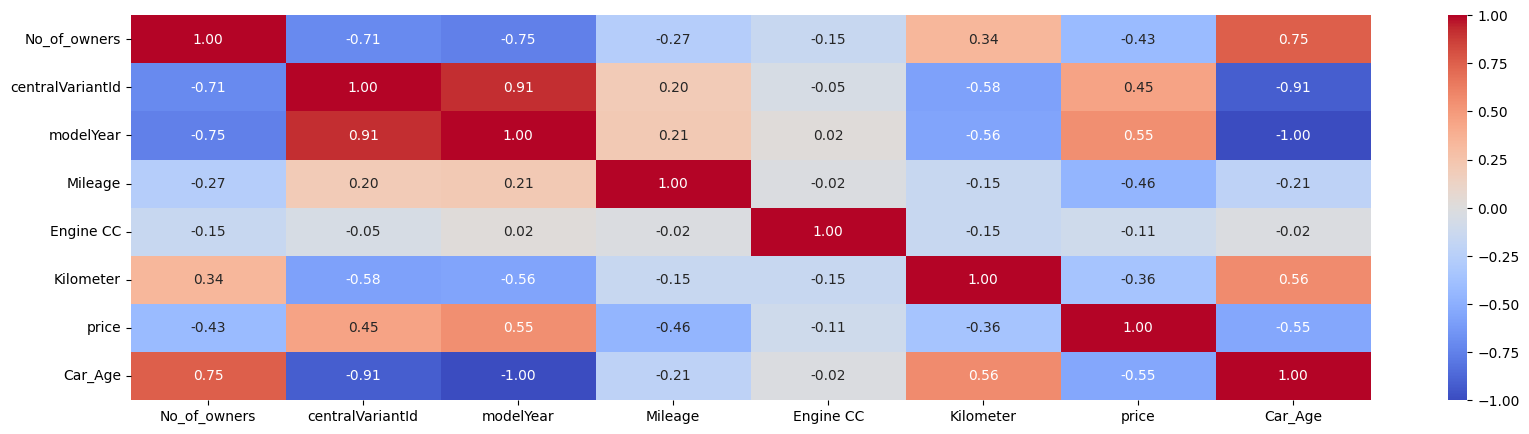

In [97]:
plt.figure(figsize=(20,5))
sns.heatmap(data=data_corr.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [95]:
# morethan 70% correlation removed
# data_cr=data_cr.drop(['CentralVariantId', 'No_of_owners'], axis =1)

In [99]:
 data_cr=data_cr.drop(['Engine CC'], axis =1)

In [100]:
data_cr

,model,Body_Type,transmission,No_of_owners,centralVariantId,modelYear,Mileage,Fuel_Type,Kilometer,price,City,Car_Age
0,Maruti,Hatchback,Manual,3,3979,2015,23.10,Petrol,120000.0,400000.0,Bangalore,9
1,Ford,SUV,Manual,2,6087,2018,17.00,Petrol,32706.0,811000.0,Bangalore,6
2,Tata,Hatchback,Manual,1,2983,2018,23.84,Petrol,11949.0,585000.0,Bangalore,6
3,Hyundai,Sedan,Manual,1,1867,2014,19.10,Petrol,17794.0,462000.0,Bangalore,10
4,Maruti,SUV,Manual,1,4277,2015,23.65,Diesel,60000.0,790000.0,Bangalore,9
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Hatchback,Manual,1,8682,2022,25.24,Petrol,10000.0,510000.0,kolkata,2
8365,Maruti,Hatchback,Manual,1,3943,2014,22.74,Petrol,120000.0,180000.0,kolkata,10
8366,Mercedes-Benz,Sedan,Automatic,3,4672,2011,11.74,Petrol,50000.0,550000.0,kolkata,13
8367,Maruti,Hatchback,Manual,1,4144,2012,18.50,Petrol,40000.0,140000.0,kolkata,12


In [101]:
data_cr.to_csv('C:/Users/SG_LENOVO/Downloads/df_preprocess.csv',index= False)

In [102]:
data_cr

,model,Body_Type,transmission,No_of_owners,centralVariantId,modelYear,Mileage,Fuel_Type,Kilometer,price,City,Car_Age
0,Maruti,Hatchback,Manual,3,3979,2015,23.10,Petrol,120000.0,400000.0,Bangalore,9
1,Ford,SUV,Manual,2,6087,2018,17.00,Petrol,32706.0,811000.0,Bangalore,6
2,Tata,Hatchback,Manual,1,2983,2018,23.84,Petrol,11949.0,585000.0,Bangalore,6
3,Hyundai,Sedan,Manual,1,1867,2014,19.10,Petrol,17794.0,462000.0,Bangalore,10
4,Maruti,SUV,Manual,1,4277,2015,23.65,Diesel,60000.0,790000.0,Bangalore,9
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Hatchback,Manual,1,8682,2022,25.24,Petrol,10000.0,510000.0,kolkata,2
8365,Maruti,Hatchback,Manual,1,3943,2014,22.74,Petrol,120000.0,180000.0,kolkata,10
8366,Mercedes-Benz,Sedan,Automatic,3,4672,2011,11.74,Petrol,50000.0,550000.0,kolkata,13
8367,Maruti,Hatchback,Manual,1,4144,2012,18.50,Petrol,40000.0,140000.0,kolkata,12


In [228]:
data_cr1=data_cr.copy()

In [229]:
data_cr1

,model,Body_Type,transmission,No_of_owners,centralVariantId,modelYear,Mileage,Fuel_Type,Kilometer,price,City,Car_Age
0,Maruti,Hatchback,Manual,3,3979,2015,23.10,Petrol,120000.0,400000.0,Bangalore,9
1,Ford,SUV,Manual,2,6087,2018,17.00,Petrol,32706.0,811000.0,Bangalore,6
2,Tata,Hatchback,Manual,1,2983,2018,23.84,Petrol,11949.0,585000.0,Bangalore,6
3,Hyundai,Sedan,Manual,1,1867,2014,19.10,Petrol,17794.0,462000.0,Bangalore,10
4,Maruti,SUV,Manual,1,4277,2015,23.65,Diesel,60000.0,790000.0,Bangalore,9
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Hatchback,Manual,1,8682,2022,25.24,Petrol,10000.0,510000.0,kolkata,2
8365,Maruti,Hatchback,Manual,1,3943,2014,22.74,Petrol,120000.0,180000.0,kolkata,10
8366,Mercedes-Benz,Sedan,Automatic,3,4672,2011,11.74,Petrol,50000.0,550000.0,kolkata,13
8367,Maruti,Hatchback,Manual,1,4144,2012,18.50,Petrol,40000.0,140000.0,kolkata,12


# EDA

In [230]:
data_cr1

,model,Body_Type,transmission,No_of_owners,centralVariantId,modelYear,Mileage,Fuel_Type,Kilometer,price,City,Car_Age
0,Maruti,Hatchback,Manual,3,3979,2015,23.10,Petrol,120000.0,400000.0,Bangalore,9
1,Ford,SUV,Manual,2,6087,2018,17.00,Petrol,32706.0,811000.0,Bangalore,6
2,Tata,Hatchback,Manual,1,2983,2018,23.84,Petrol,11949.0,585000.0,Bangalore,6
3,Hyundai,Sedan,Manual,1,1867,2014,19.10,Petrol,17794.0,462000.0,Bangalore,10
4,Maruti,SUV,Manual,1,4277,2015,23.65,Diesel,60000.0,790000.0,Bangalore,9
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Hatchback,Manual,1,8682,2022,25.24,Petrol,10000.0,510000.0,kolkata,2
8365,Maruti,Hatchback,Manual,1,3943,2014,22.74,Petrol,120000.0,180000.0,kolkata,10
8366,Mercedes-Benz,Sedan,Automatic,3,4672,2011,11.74,Petrol,50000.0,550000.0,kolkata,13
8367,Maruti,Hatchback,Manual,1,4144,2012,18.50,Petrol,40000.0,140000.0,kolkata,12


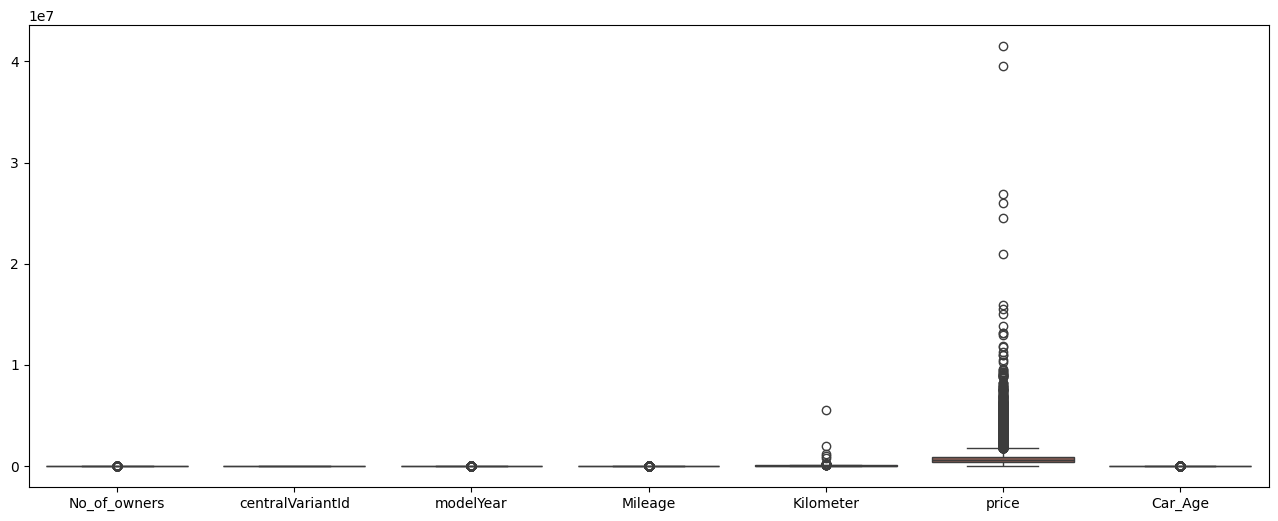

In [231]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data_cr1)
plt.show()

# Observation
#Checking for outlier ->  Kilometer  outlier

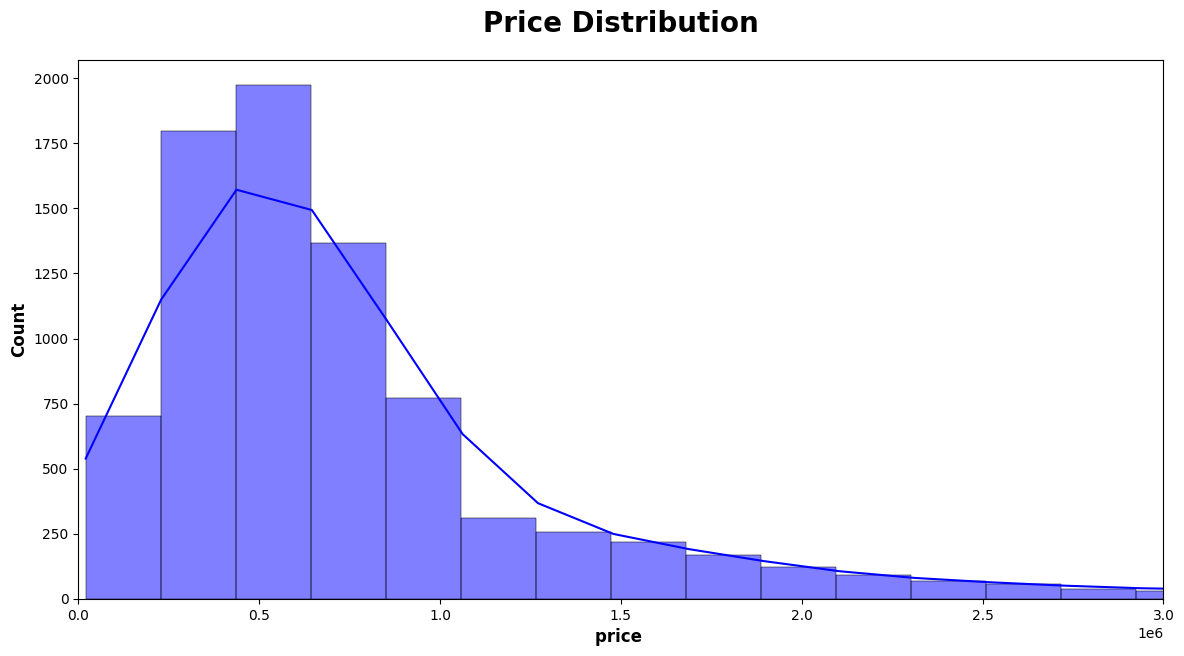

In [232]:
plt.subplots(figsize=(14,7))
sns.histplot(data_cr1.price, bins=200, kde=True, color = 'b')
plt.title("Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("price ", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

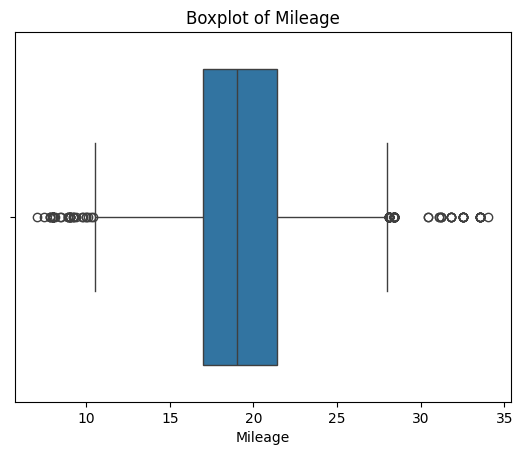

In [233]:
# Price Outlier Detection
sns.boxplot(data=data_cr1, x='Mileage')
plt.title('Boxplot of Mileage')
plt.show()


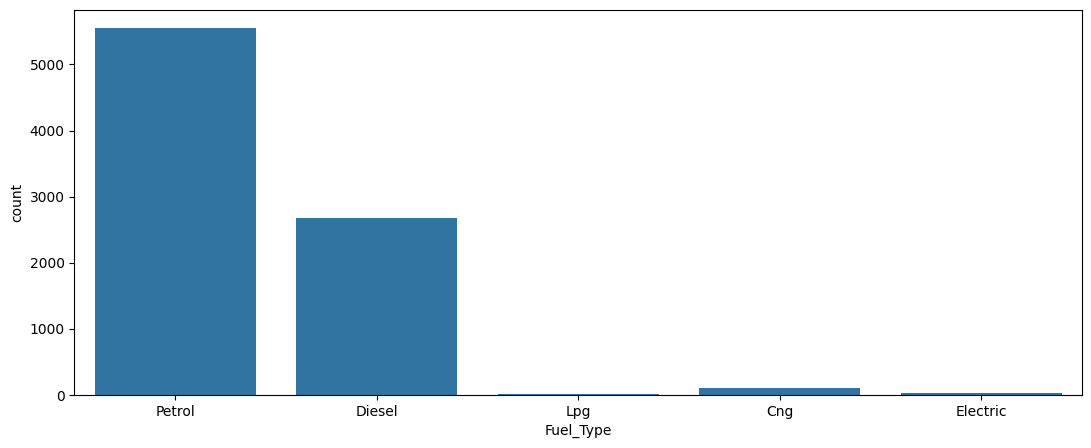

In [234]:
plt.figure(figsize = (13,5))
sns.countplot(data = data_cr1, x = 'Fuel_Type')
plt.show()  

# Huge number of cars based petrol fuel type

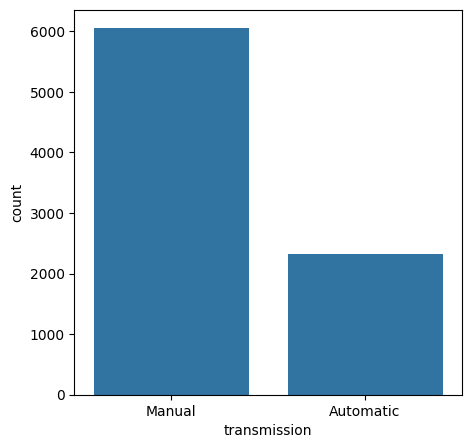

In [235]:
plt.figure(figsize = (5,5))
sns.countplot(data = data_cr1, x = 'transmission')
plt.show()  # highly available cars are manual

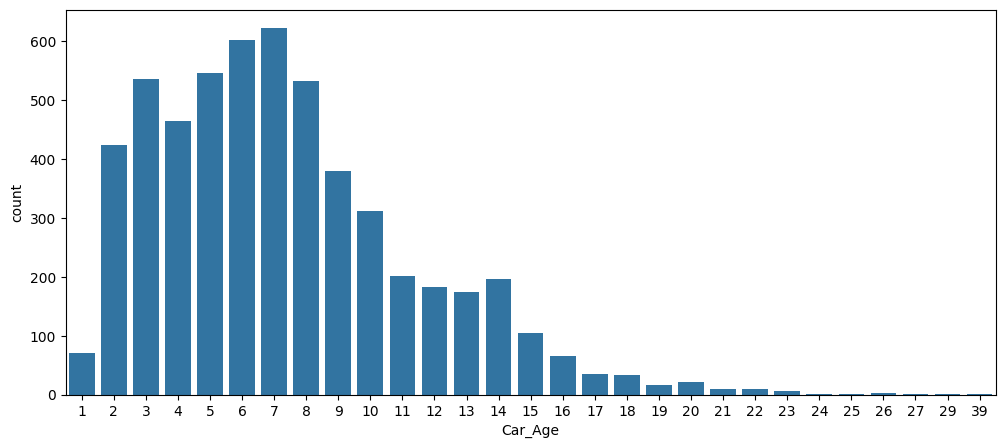

In [236]:
plt.figure(figsize =(12,5))      # only petrol type cars based on year count 
sns.countplot(data =data_cr1[data_cr1['Fuel_Type'] == 'Petrol'], x = 'Car_Age')  # only petrol type cars high with 2017 modelyear
plt.show()

In [237]:
data_cr1.head(1)

,model,Body_Type,transmission,No_of_owners,centralVariantId,modelYear,Mileage,Fuel_Type,Kilometer,price,City,Car_Age
0,Maruti,Hatchback,Manual,3,3979,2015,23.1,Petrol,120000.0,400000.0,Bangalore,9


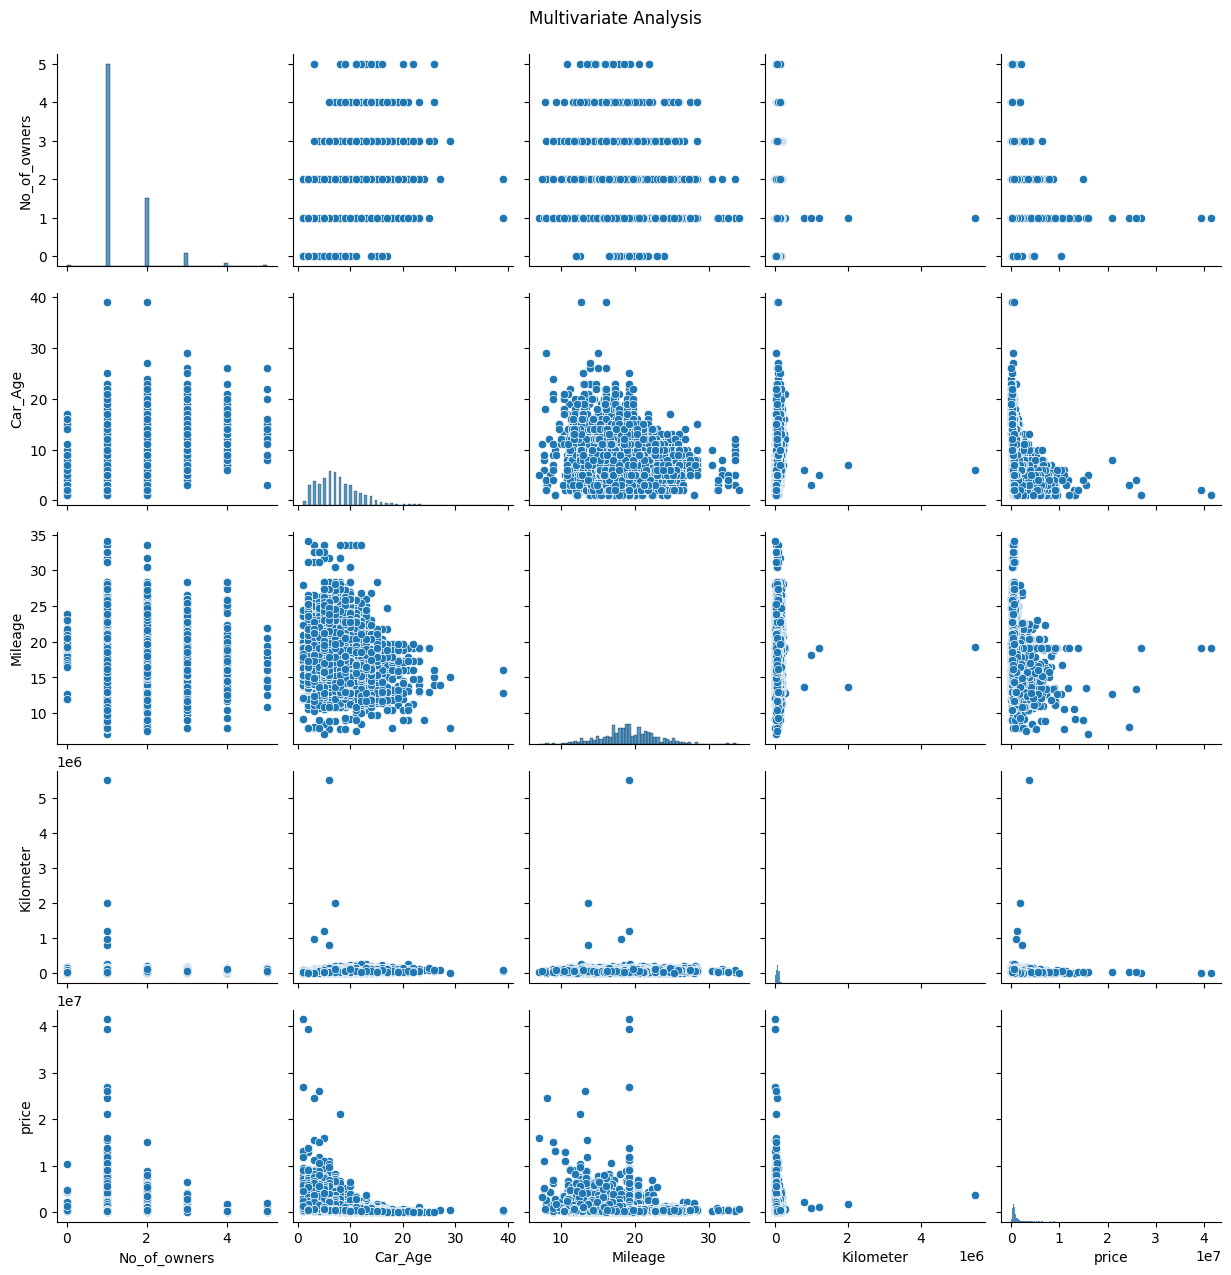

In [238]:
# Multivariate Analysis
sns.pairplot(data_cr1[['No_of_owners', 'Car_Age', 'Mileage', 'Kilometer', 'price']])
plt.suptitle('Multivariate Analysis', y=1.02)
plt.show()

In [239]:
# Observation

# Petrol - High number of model belong to the year 2017

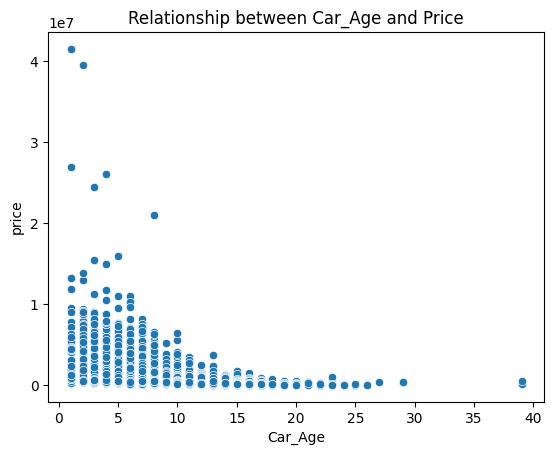

In [240]:
# Bivariate analysis to find the relationship between 
sns.scatterplot(data=data_cr1, x='Car_Age', y = 'price')
plt.title('Relationship between Car_Age and Price')
plt.show()

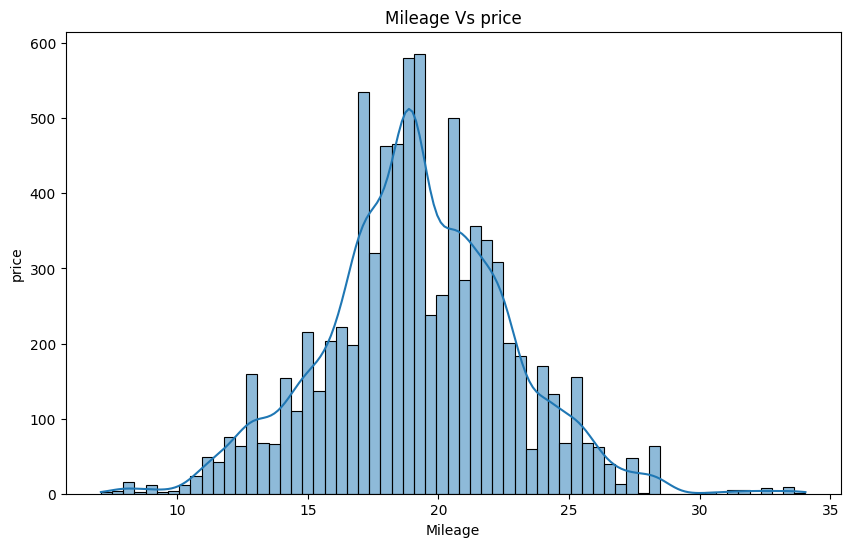

In [241]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cr1['Mileage'], kde=True)
plt.title('Mileage Vs price')
plt.xlabel('Mileage')
plt.ylabel('price')
plt.show()

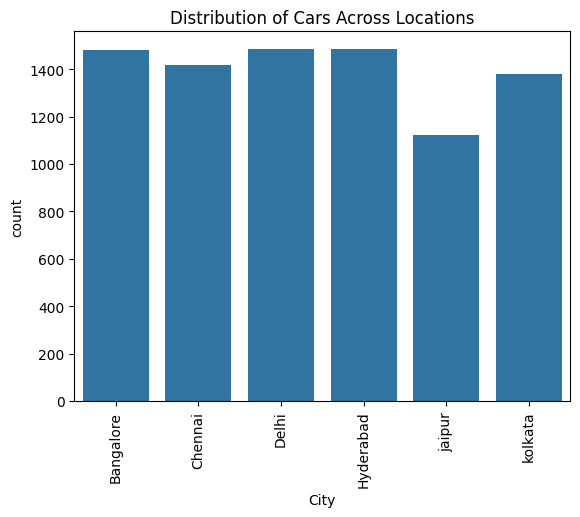

In [242]:
sns.countplot(data=data_cr1, x='City')
plt.title('Distribution of Cars Across Locations')
plt.xticks(rotation=90)
plt.show()


In [243]:
data_cr1["Body_Type"].value_counts()

Body_Type
Hatchback        3571
SUV              2225
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

In [244]:
data_cr1["Body_Type"].isnull().sum()

np.int64(0)

In [245]:
data_cr1

,model,Body_Type,transmission,No_of_owners,centralVariantId,modelYear,Mileage,Fuel_Type,Kilometer,price,City,Car_Age
0,Maruti,Hatchback,Manual,3,3979,2015,23.10,Petrol,120000.0,400000.0,Bangalore,9
1,Ford,SUV,Manual,2,6087,2018,17.00,Petrol,32706.0,811000.0,Bangalore,6
2,Tata,Hatchback,Manual,1,2983,2018,23.84,Petrol,11949.0,585000.0,Bangalore,6
3,Hyundai,Sedan,Manual,1,1867,2014,19.10,Petrol,17794.0,462000.0,Bangalore,10
4,Maruti,SUV,Manual,1,4277,2015,23.65,Diesel,60000.0,790000.0,Bangalore,9
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Hatchback,Manual,1,8682,2022,25.24,Petrol,10000.0,510000.0,kolkata,2
8365,Maruti,Hatchback,Manual,1,3943,2014,22.74,Petrol,120000.0,180000.0,kolkata,10
8366,Mercedes-Benz,Sedan,Automatic,3,4672,2011,11.74,Petrol,50000.0,550000.0,kolkata,13
8367,Maruti,Hatchback,Manual,1,4144,2012,18.50,Petrol,40000.0,140000.0,kolkata,12


In [246]:
data_cr1.City.value_counts().index

Index(['Delhi', 'Hyderabad', 'Bangalore', 'Chennai', 'kolkata', 'jaipur'], dtype='object', name='City')

In [247]:
data_cr1['Body_Type'].nunique()

10

In [248]:
data_cr1.head()

,model,Body_Type,transmission,No_of_owners,centralVariantId,modelYear,Mileage,Fuel_Type,Kilometer,price,City,Car_Age
0,Maruti,Hatchback,Manual,3,3979,2015,23.10,Petrol,120000.0,400000.0,Bangalore,9
1,Ford,SUV,Manual,2,6087,2018,17.00,Petrol,32706.0,811000.0,Bangalore,6
2,Tata,Hatchback,Manual,1,2983,2018,23.84,Petrol,11949.0,585000.0,Bangalore,6
3,Hyundai,Sedan,Manual,1,1867,2014,19.10,Petrol,17794.0,462000.0,Bangalore,10
4,Maruti,SUV,Manual,1,4277,2015,23.65,Diesel,60000.0,790000.0,Bangalore,9


In [121]:
data_cr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             8369 non-null   object 
 1   Body_Type         8369 non-null   object 
 2   transmission      8369 non-null   object 
 3   No_of_owners      8369 non-null   int64  
 4   centralVariantId  8369 non-null   int64  
 5   modelYear         8369 non-null   int64  
 6   Mileage           8369 non-null   float64
 7   Fuel_Type         8369 non-null   object 
 8   Kilometer         8369 non-null   float64
 9   price             8369 non-null   float64
 10  City              8369 non-null   object 
 11  Car_Age           8369 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 784.7+ KB


# Label Encoding

In [249]:
le=LabelEncoder()

In [250]:
cat_col = data_cr1.select_dtypes(include=["object"]).columns

In [251]:
label_encoder_mapping = {}
for column in cat_col:
    label_encoder = LabelEncoder()
    data_cr1[column + '_encoded'] = label_encoder.fit_transform(data_cr1[column])
    label_encoder_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [252]:
new_df_encoded = pd.get_dummies(data_cr1, columns=cat_col, prefix=cat_col)

In [253]:
for column, mapping in label_encoder_mapping.items():
    print(f"{column} Mapping:")
    print(mapping)
    print()

model Mapping:
{'Ambassador': np.int64(0), 'Audi': np.int64(1), 'BMW': np.int64(2), 'Chevrolet': np.int64(3), 'Citroen': np.int64(4), 'Datsun': np.int64(5), 'Fiat': np.int64(6), 'Ford': np.int64(7), 'Hindustan': np.int64(8), 'Honda': np.int64(9), 'Hyundai': np.int64(10), 'Isuzu': np.int64(11), 'Jaguar': np.int64(12), 'Jeep': np.int64(13), 'Kia': np.int64(14), 'Land': np.int64(15), 'Lexus': np.int64(16), 'MG': np.int64(17), 'Mahindra': np.int64(18), 'Maruti': np.int64(19), 'Mercedes-Benz': np.int64(20), 'Mini': np.int64(21), 'Mitsubishi': np.int64(22), 'Nissan': np.int64(23), 'OpelCorsa': np.int64(24), 'Porsche': np.int64(25), 'Renault': np.int64(26), 'Skoda': np.int64(27), 'Tata': np.int64(28), 'Toyota': np.int64(29), 'Volkswagen': np.int64(30), 'Volvo': np.int64(31)}

Body_Type Mapping:
{'Convertibles': np.int64(0), 'Coupe': np.int64(1), 'Hatchback': np.int64(2), 'Hybrids': np.int64(3), 'MUV': np.int64(4), 'Minivans': np.int64(5), 'Pickup Trucks': np.int64(6), 'SUV': np.int64(7), 'Sed

In [110]:
# changing all objects into integer
#for i in data_cr1.select_dtypes(include=["object"]).columns:
    #data_cr1[i]=le.fit_transform(data_cr1[i])

In [254]:
data_cr1

,model,Body_Type,transmission,No_of_owners,centralVariantId,modelYear,Mileage,Fuel_Type,Kilometer,price,City,Car_Age,model_encoded,Body_Type_encoded,transmission_encoded,Fuel_Type_encoded,City_encoded
0,Maruti,Hatchback,Manual,3,3979,2015,23.10,Petrol,120000.0,400000.0,Bangalore,9,19,2,1,4,0
1,Ford,SUV,Manual,2,6087,2018,17.00,Petrol,32706.0,811000.0,Bangalore,6,7,7,1,4,0
2,Tata,Hatchback,Manual,1,2983,2018,23.84,Petrol,11949.0,585000.0,Bangalore,6,28,2,1,4,0
3,Hyundai,Sedan,Manual,1,1867,2014,19.10,Petrol,17794.0,462000.0,Bangalore,10,10,8,1,4,0
4,Maruti,SUV,Manual,1,4277,2015,23.65,Diesel,60000.0,790000.0,Bangalore,9,19,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Hatchback,Manual,1,8682,2022,25.24,Petrol,10000.0,510000.0,kolkata,2,19,2,1,4,5
8365,Maruti,Hatchback,Manual,1,3943,2014,22.74,Petrol,120000.0,180000.0,kolkata,10,19,2,1,4,5
8366,Mercedes-Benz,Sedan,Automatic,3,4672,2011,11.74,Petrol,50000.0,550000.0,kolkata,13,20,8,0,4,5
8367,Maruti,Hatchback,Manual,1,4144,2012,18.50,Petrol,40000.0,140000.0,kolkata,12,19,2,1,4,5


In [255]:
data_cr1.dtypes

model                    object
Body_Type                object
transmission             object
No_of_owners              int64
centralVariantId          int64
modelYear                 int64
Mileage                 float64
Fuel_Type                object
Kilometer               float64
price                   float64
City                     object
Car_Age                   int64
model_encoded             int64
Body_Type_encoded         int64
transmission_encoded      int64
Fuel_Type_encoded         int64
City_encoded              int64
dtype: object

In [256]:
data_cr1['Kilometer'] = np.log1p(data_cr1['Kilometer'])

In [112]:
#min-max scaler
#mm =MinMaxScaler()
#data_cr1[["Kilometer","Body_Type","transmission","model","Mileage","centralVariantId","Engine CC","Fuel_Type",'Car_Age',"City"]]=mm.fit_transform(data_cr1[["Kilometer","Body_Type","transmission","model","Mileage","centralVariantId","Engine CC","Fuel_Type",'Car_Age',"City"]])

In [133]:
data_cr1['Kilometer'].min()

np.float64(0.0)

In [134]:
data_cr1['Kilometer'].max()

np.float64(15.520258832020865)

In [135]:
data_cr1['Kilometer'].mean()

np.float64(10.730536185028319)

In [136]:
data_cr1

,model,Body_Type,transmission,No_of_owners,centralVariantId,modelYear,Mileage,Fuel_Type,Kilometer,price,City,Car_Age,model_encoded,Body_Type_encoded,transmission_encoded,Fuel_Type_encoded,City_encoded
0,Maruti,Hatchback,Manual,3,3979,2015,23.10,Petrol,11.695255,400000.0,Bangalore,9,19,2,1,4,0
1,Ford,SUV,Manual,2,6087,2018,17.00,Petrol,10.395344,811000.0,Bangalore,6,7,7,1,4,0
2,Tata,Hatchback,Manual,1,2983,2018,23.84,Petrol,9.388487,585000.0,Bangalore,6,28,2,1,4,0
3,Hyundai,Sedan,Manual,1,1867,2014,19.10,Petrol,9.786673,462000.0,Bangalore,10,10,8,1,4,0
4,Maruti,SUV,Manual,1,4277,2015,23.65,Diesel,11.002117,790000.0,Bangalore,9,19,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Hatchback,Manual,1,8682,2022,25.24,Petrol,9.210440,510000.0,kolkata,2,19,2,1,4,5
8365,Maruti,Hatchback,Manual,1,3943,2014,22.74,Petrol,11.695255,180000.0,kolkata,10,19,2,1,4,5
8366,Mercedes-Benz,Sedan,Automatic,3,4672,2011,11.74,Petrol,10.819798,550000.0,kolkata,13,20,8,0,4,5
8367,Maruti,Hatchback,Manual,1,4144,2012,18.50,Petrol,10.596660,140000.0,kolkata,12,19,2,1,4,5


In [114]:
#def outliers(data_cr1,column):
    #q1=data_cr1[column].quantile(0.25)
    #q3=data_cr1[column].quantile(0.75)
    #IQR = q3-q1
    #lower=q1-1.5*IQR
    #upper=q3+1.5*IQR
    #return data_cr1[(data_cr1[column]>=lower)&(data_cr1[column]<=upper)]
#kilo =outliers(data_cr1,"Kilometer")
#price=outliers(kilo,"price")
#data_cr1=price

In [137]:
data_cr1

,model,Body_Type,transmission,No_of_owners,centralVariantId,modelYear,Mileage,Fuel_Type,Kilometer,price,City,Car_Age,model_encoded,Body_Type_encoded,transmission_encoded,Fuel_Type_encoded,City_encoded
0,Maruti,Hatchback,Manual,3,3979,2015,23.10,Petrol,11.695255,400000.0,Bangalore,9,19,2,1,4,0
1,Ford,SUV,Manual,2,6087,2018,17.00,Petrol,10.395344,811000.0,Bangalore,6,7,7,1,4,0
2,Tata,Hatchback,Manual,1,2983,2018,23.84,Petrol,9.388487,585000.0,Bangalore,6,28,2,1,4,0
3,Hyundai,Sedan,Manual,1,1867,2014,19.10,Petrol,9.786673,462000.0,Bangalore,10,10,8,1,4,0
4,Maruti,SUV,Manual,1,4277,2015,23.65,Diesel,11.002117,790000.0,Bangalore,9,19,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Hatchback,Manual,1,8682,2022,25.24,Petrol,9.210440,510000.0,kolkata,2,19,2,1,4,5
8365,Maruti,Hatchback,Manual,1,3943,2014,22.74,Petrol,11.695255,180000.0,kolkata,10,19,2,1,4,5
8366,Mercedes-Benz,Sedan,Automatic,3,4672,2011,11.74,Petrol,10.819798,550000.0,kolkata,13,20,8,0,4,5
8367,Maruti,Hatchback,Manual,1,4144,2012,18.50,Petrol,10.596660,140000.0,kolkata,12,19,2,1,4,5


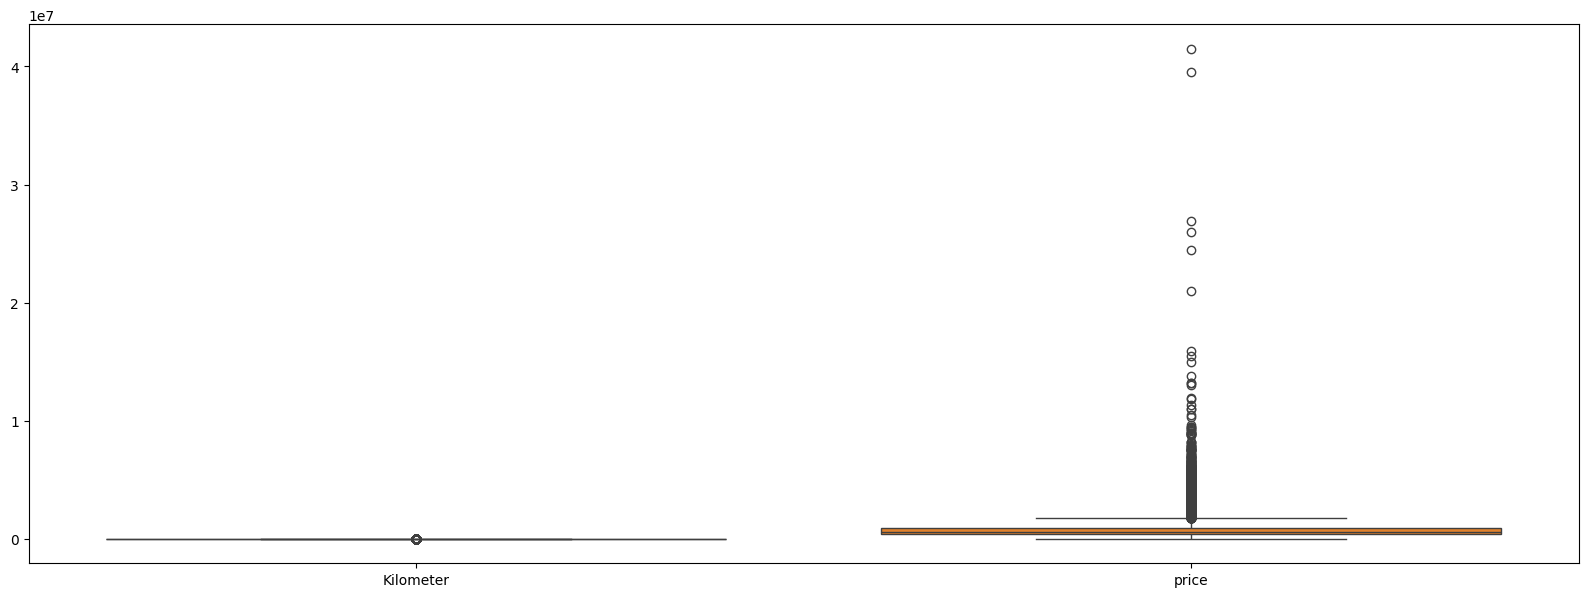

In [138]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data_cr1[["Kilometer","price"]])
plt.show()

In [139]:
data_cr1[["Kilometer","price"]].describe()

,Kilometer,price
count,8369.000000,8.369000e+03
mean,10.730536,9.569037e+05
std,0.808337,1.416203e+06
min,0.000000,2.016100e+04
25%,10.308986,3.990000e+05
50%,10.891038,6.010000e+05
75%,11.289794,9.500000e+05
max,15.520259,4.150000e+07


In [140]:
data_cr1.head(1)

,model,Body_Type,transmission,No_of_owners,centralVariantId,modelYear,Mileage,Fuel_Type,Kilometer,price,City,Car_Age,model_encoded,Body_Type_encoded,transmission_encoded,Fuel_Type_encoded,City_encoded
0,Maruti,Hatchback,Manual,3,3979,2015,23.1,Petrol,11.695255,400000.0,Bangalore,9,19,2,1,4,0


# Feature selection

In [257]:
data_cr1=data_cr1.drop(columns = ['model', 'Body_Type','transmission','Fuel_Type','City'])

In [258]:
data_cr1

,No_of_owners,centralVariantId,modelYear,Mileage,Kilometer,price,Car_Age,model_encoded,Body_Type_encoded,transmission_encoded,Fuel_Type_encoded,City_encoded
0,3,3979,2015,23.10,11.695255,400000.0,9,19,2,1,4,0
1,2,6087,2018,17.00,10.395344,811000.0,6,7,7,1,4,0
2,1,2983,2018,23.84,9.388487,585000.0,6,28,2,1,4,0
3,1,1867,2014,19.10,9.786673,462000.0,10,10,8,1,4,0
4,1,4277,2015,23.65,11.002117,790000.0,9,19,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,1,8682,2022,25.24,9.210440,510000.0,2,19,2,1,4,5
8365,1,3943,2014,22.74,11.695255,180000.0,10,19,2,1,4,5
8366,3,4672,2011,11.74,10.819798,550000.0,13,20,8,0,4,5
8367,1,4144,2012,18.50,10.596660,140000.0,12,19,2,1,4,5


In [259]:
x = data_cr1.drop('price',axis=1)
y = data_cr1['price']

In [260]:
x

,No_of_owners,centralVariantId,modelYear,Mileage,Kilometer,Car_Age,model_encoded,Body_Type_encoded,transmission_encoded,Fuel_Type_encoded,City_encoded
0,3,3979,2015,23.10,11.695255,9,19,2,1,4,0
1,2,6087,2018,17.00,10.395344,6,7,7,1,4,0
2,1,2983,2018,23.84,9.388487,6,28,2,1,4,0
3,1,1867,2014,19.10,9.786673,10,10,8,1,4,0
4,1,4277,2015,23.65,11.002117,9,19,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
8364,1,8682,2022,25.24,9.210440,2,19,2,1,4,5
8365,1,3943,2014,22.74,11.695255,10,19,2,1,4,5
8366,3,4672,2011,11.74,10.819798,13,20,8,0,4,5
8367,1,4144,2012,18.50,10.596660,12,19,2,1,4,5


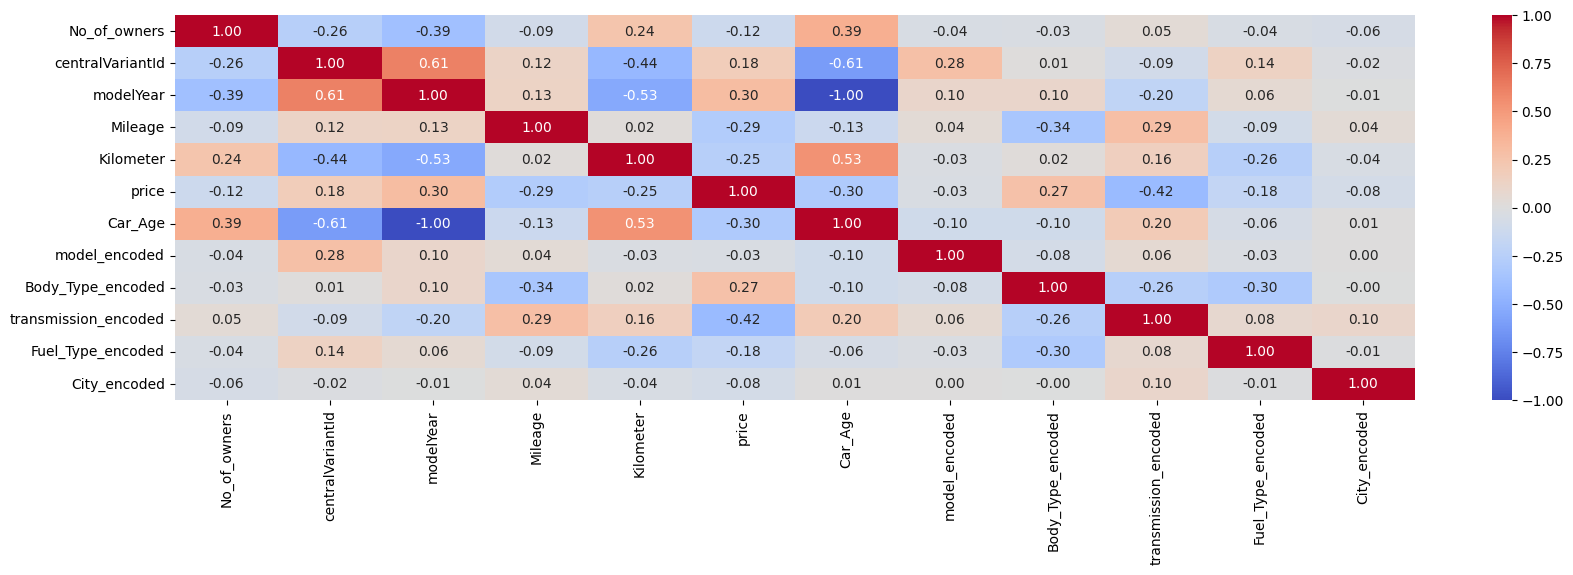

In [261]:
plt.figure(figsize=(20,5))
sns.heatmap(data=data_cr1.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [262]:
y

0       400000.0
1       811000.0
2       585000.0
3       462000.0
4       790000.0
          ...   
8364    510000.0
8365    180000.0
8366    550000.0
8367    140000.0
8368    500000.0
Name: price, Length: 8369, dtype: float64

In [263]:
def model_regression(x,y,algorithm):
    for i in algorithm:
        xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)
        model = i().fit(xtrain,ytrain)
        # predict for train and test accuracy # Predicts the target variable for both the training and testing sets using the trained model
        y_train_pred = model.predict(xtrain)
        y_test_pred  = model.predict(xtest)

       # Accuracy score
        training = r2_score(ytrain,y_train_pred)
        testing = r2_score(ytest,y_test_pred)
        data = {'Algorithm':i.__name__, 'Training R2 Score':training,'Testing R2 Score':testing}
        print(data)

In [264]:
model_regression(x,y,[DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor,LinearRegression])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 0.9998950679784523, 'Testing R2 Score': 0.5792027745606194}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 0.9998950326474537, 'Testing R2 Score': 0.6224060908781603}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9487582603297607, 'Testing R2 Score': 0.7238344762831853}
{'Algorithm': 'GradientBoostingRegressor', 'Training R2 Score': 0.758503129891278, 'Testing R2 Score': 0.6225535282810479}
{'Algorithm': 'LinearRegression', 'Training R2 Score': 0.3586566231203827, 'Testing R2 Score': 0.28266404986112026}


In [265]:
fs= RandomForestRegressor(n_estimators=200,random_state=45)

In [266]:
fs.fit(x,y)

RandomForestRegressor(n_estimators=200, random_state=45)

In [267]:
fs.feature_importances_

array([0.00495941, 0.14943682, 0.04540018, 0.16348752, 0.17115227,
       0.04546787, 0.11154476, 0.06901252, 0.18162662, 0.04364102,
       0.01427102])

In [268]:
fs_score=pd.DataFrame({
    "columns":x.columns,
    "score":fs.feature_importances_
}).sort_values("score",ascending=False).head(11)

In [269]:
fs_score

,columns,score
8,transmission_encoded,0.181627
4,Kilometer,0.171152
3,Mileage,0.163488
1,centralVariantId,0.149437
6,model_encoded,0.111545
7,Body_Type_encoded,0.069013
5,Car_Age,0.045468
2,modelYear,0.045400
9,Fuel_Type_encoded,0.043641
10,City_encoded,0.014271


In [270]:
list(fs_score.sort_values("score",ascending=False).head(11)["columns"].values)

['transmission_encoded',
 'Kilometer',
 'Mileage',
 'centralVariantId',
 'model_encoded',
 'Body_Type_encoded',
 'Car_Age',
 'modelYear',
 'Fuel_Type_encoded',
 'City_encoded',
 'No_of_owners']

In [271]:
selected_features =list(fs_score.sort_values("score",ascending=False).head(11)["columns"].values)

In [272]:
x = x[selected_features]

In [273]:
x

,transmission_encoded,Kilometer,Mileage,centralVariantId,model_encoded,Body_Type_encoded,Car_Age,modelYear,Fuel_Type_encoded,City_encoded,No_of_owners
0,1,11.695255,23.10,3979,19,2,9,2015,4,0,3
1,1,10.395344,17.00,6087,7,7,6,2018,4,0,2
2,1,9.388487,23.84,2983,28,2,6,2018,4,0,1
3,1,9.786673,19.10,1867,10,8,10,2014,4,0,1
4,1,11.002117,23.65,4277,19,7,9,2015,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8364,1,9.210440,25.24,8682,19,2,2,2022,4,5,1
8365,1,11.695255,22.74,3943,19,2,10,2014,4,5,1
8366,0,10.819798,11.74,4672,20,8,13,2011,4,5,3
8367,1,10.596660,18.50,4144,19,2,12,2012,4,5,1


# Model build

# LinearRegression

In [274]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [275]:
x_train.shape

(6695, 11)

In [276]:
x_test.shape

(1674, 11)

In [277]:
model=LinearRegression() 

In [278]:
model.fit(x_train,y_train)

LinearRegression()

In [279]:
predicting_value=model.predict(x_test)

In [280]:
predicting_value

array([1017477.85209025, -229191.62078251,   37051.15536551, ...,
       1768270.61176723,  275771.88774002, 1220725.07809672])

In [281]:
predict_train = model.predict(x_train)

In [282]:
mean_squared_error(y_train,predict_train)

np.float64(1128369509447.6284)

In [283]:
mean_absolute_error(y_train,predict_train)

np.float64(478536.64264618687)

In [284]:
r2_score(y_train,predict_train)

0.3586566231203825

In [285]:
print(f"mean_squared_error:{mean_squared_error(y_train,predict_train)}")
print(f"mean_absolute_error:{mean_absolute_error(y_train,predict_train)}")
print(f"r2_score:{r2_score(y_train,predict_train)}")

mean_squared_error:1128369509447.6284
mean_absolute_error:478536.64264618687
r2_score:0.3586566231203825


In [286]:
predict_test = model.predict(x_test)

In [287]:
mean_squared_error(y_test,predict_test)

np.float64(2141097345967.5393)

In [288]:
mean_absolute_error(y_test,predict_test)

np.float64(534479.647210703)

In [289]:
r2_score(y_test,predict_test)

0.2826640498611187

# Random forest

In [291]:
model=RandomForestRegressor(n_estimators=300,max_depth=100,random_state=47)

In [292]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [293]:
random_model=model.fit(x_train,y_train)

In [294]:
random_model

RandomForestRegressor(max_depth=100, n_estimators=300, random_state=47)

In [295]:
random_tr_predict=random_model.predict(x_train)
random_ts_predict=random_model.predict(x_test)


In [296]:
mean_squared_error(y_train,random_tr_predict)

np.float64(90345108913.51068)

In [297]:
mean_absolute_error(y_train,random_tr_predict)

np.float64(73154.04654729157)

In [298]:
r2_score(y_train,random_tr_predict)

0.9486495897398785

In [299]:
print(f"mean_squared_error:{mean_squared_error(y_train,random_tr_predict)}")
print(f"mean_absolute_error:{mean_absolute_error(y_train,random_tr_predict)}")
print(f"r2_score:{r2_score(y_train,random_tr_predict)}")

mean_squared_error:90345108913.51068
mean_absolute_error:73154.04654729157
r2_score:0.9486495897398785


In [300]:
mean_squared_error(y_test,random_ts_predict)

np.float64(908553126922.8745)

In [301]:
mean_absolute_error(y_test,random_ts_predict)

np.float64(220076.47212460556)

In [302]:
r2_score(y_test,random_ts_predict)

0.6956057034116969

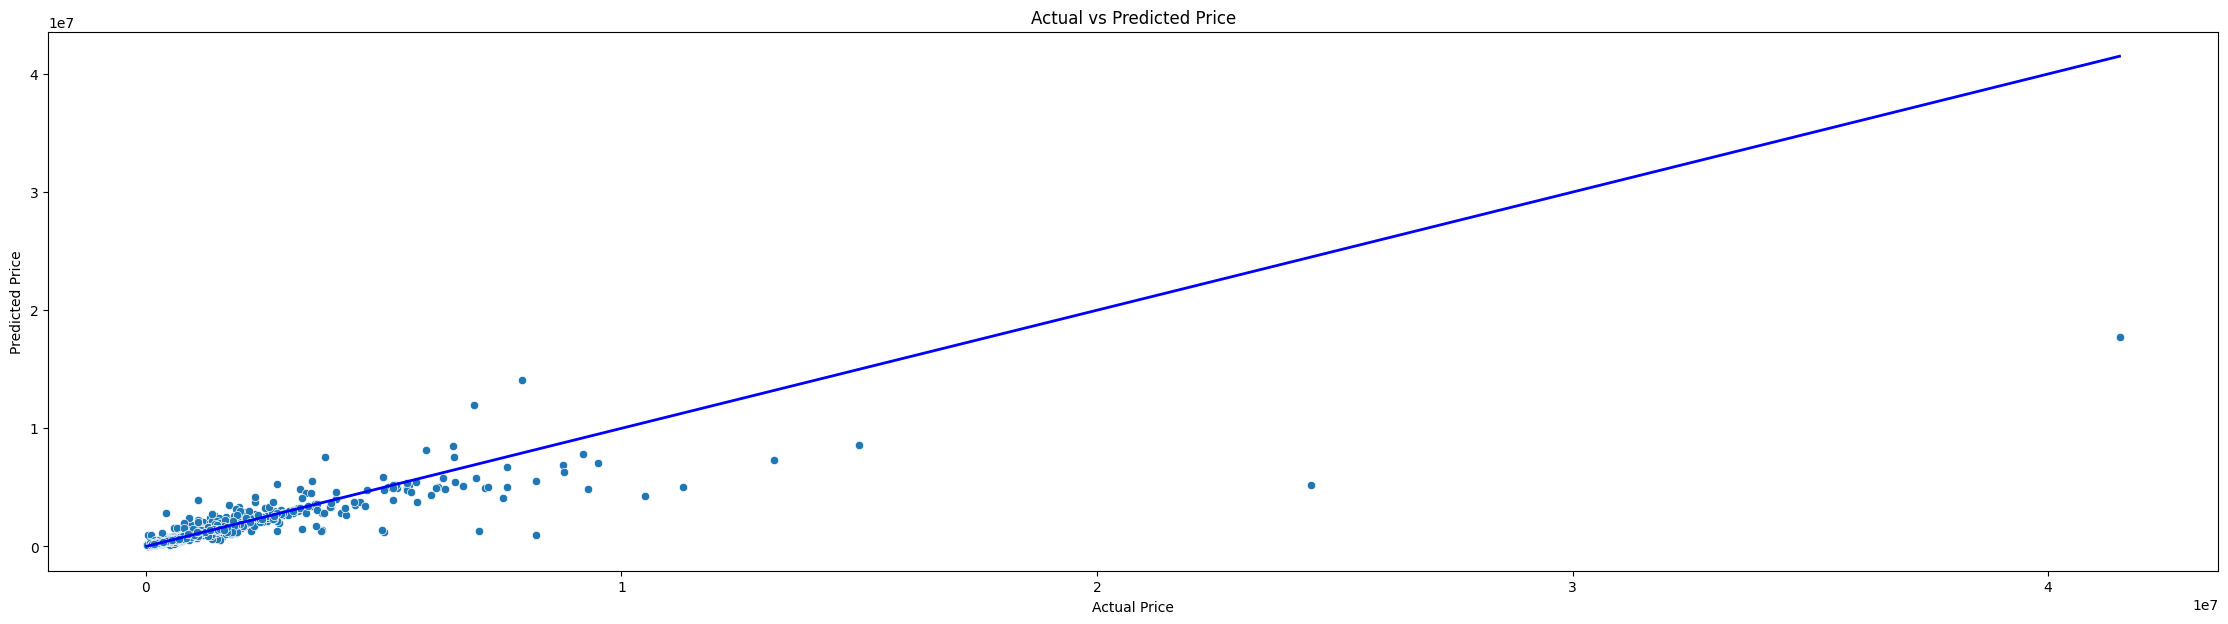

In [327]:
plt.figure(figsize=(28,7))
sns.scatterplot(x=y_test,y=random_ts_predict)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color="blue",lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

# GradientBoosting

In [304]:
gbr = GradientBoostingRegressor(random_state=42)

In [305]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [306]:
gbr_model=gbr.fit(x_train,y_train)

In [307]:
gbr_model

GradientBoostingRegressor(random_state=42)

In [308]:
gbr_tr_predict=gbr_model.predict(x_train)
gbr_ts_predict=gbr_model.predict(x_test)

In [309]:
mean_squared_error(y_train,gbr_tr_predict)

np.float64(424885817303.5519)

In [310]:
mean_absolute_error(y_train,gbr_tr_predict)

np.float64(238888.06451336417)

In [311]:
r2_score(y_train,gbr_tr_predict)

0.7585031298912781

In [312]:
mean_squared_error(y_test,gbr_ts_predict)

np.float64(1203344612747.9429)

In [313]:
mean_absolute_error(y_test,gbr_ts_predict)

np.float64(301550.94423997775)

In [314]:
r2_score(y_test,gbr_ts_predict)

0.5968411465476934

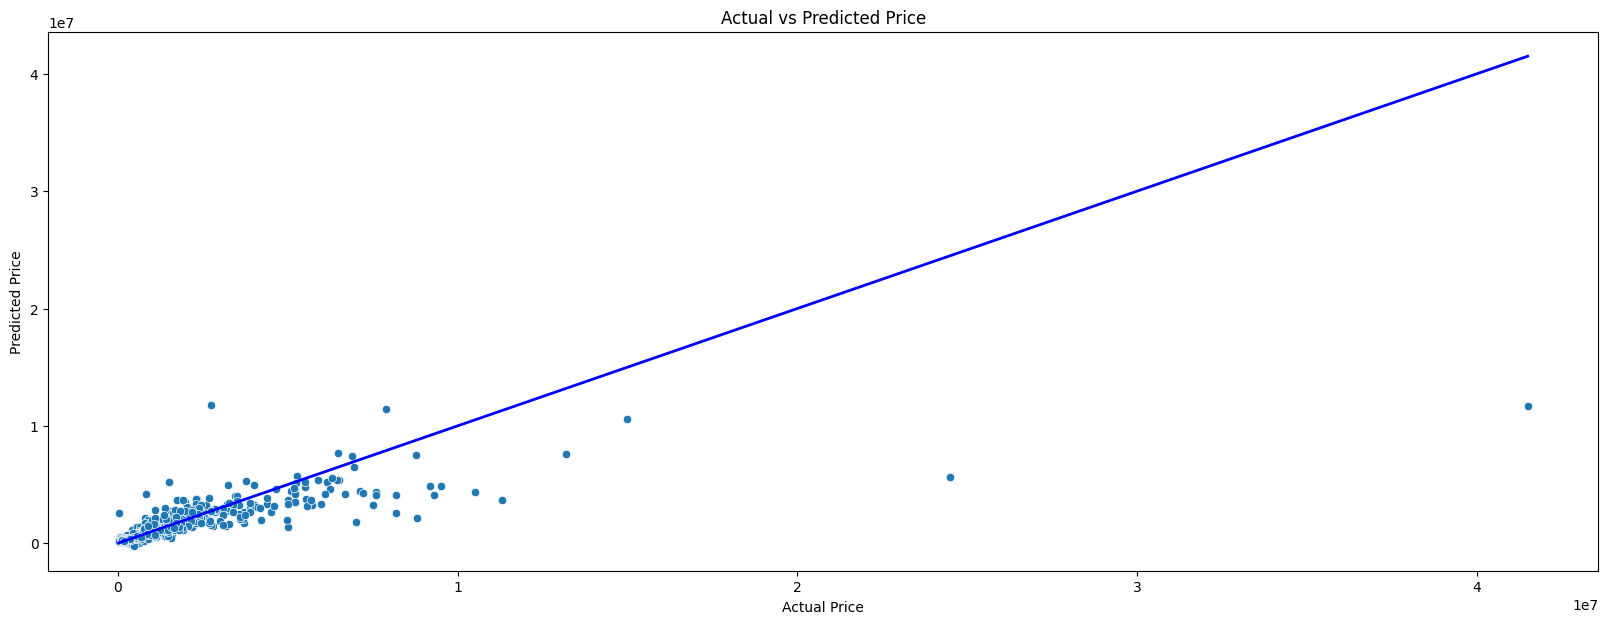

In [316]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=y_test,y=gbr_ts_predict)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color="blue",lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

# Extra tree

In [328]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [329]:
et_model = ExtraTreesRegressor(random_state=70).fit(x_train,y_train)

In [330]:
et_model

ExtraTreesRegressor(random_state=70)

In [331]:
etrain_pred = et_model.predict(x_train)

In [332]:
etest_pred=et_model.predict(x_test)

In [333]:
mean_squared_error(y_train,etrain_pred)

np.float64(184640728.6034354)

In [334]:
mean_absolute_error(y_train,etrain_pred)

np.float64(790.2295245207869)

In [335]:
r2_score(y_train,etrain_pred)

0.999895053785661

mean_squared_error(y_test,etest_pred)

In [337]:
mean_absolute_error(y_test,etest_pred)

np.float64(227735.8037495022)

In [338]:
r2_score(y_test,etest_pred)

0.6637618185408711

# Decision Tree

In [339]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [340]:
dt_model= DecisionTreeRegressor(max_depth=5,random_state=35)

In [343]:
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=35)

In [345]:
dtrain_pred = dt_model.predict(x_train)

In [352]:
dtest_pred=dt_model.predict(x_test)

In [347]:
mean_squared_error(y_train,dtrain_pred)

np.float64(875050109232.7562)

In [348]:
mean_absolute_error(y_train,dtrain_pred)

np.float64(374354.66066904145)

In [349]:
r2_score(y_train,dtrain_pred)

0.5026384643546931

In [353]:
mean_squared_error(y_test,dtest_pred)

np.float64(1922800250641.1858)

In [355]:
mean_absolute_error(y_test,dtest_pred)

np.float64(432514.64988852077)

In [356]:
r2_score(y_test,dtest_pred)

0.3558005443710053

# Save the model

In [371]:
# Save the model
output_path = "C:/Users/SG_LENOVO/Downloads/random_model.pkl"

In [372]:
with open(output_path, 'wb') as f:
    pickle.dump(random_model, f)

In [373]:
random_model

RandomForestRegressor(max_depth=100, n_estimators=300, random_state=47)

In [374]:
random_model.predict(data_cr1.loc[[2980]].drop('price', axis = 1).values) # Instead of line 84 to 86 , we can do this method

C:\Users\SG_LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([378484.51])

In [375]:
m1 = pd.read_pickle("random_model.pkl")

In [376]:
m1.predict(data_cr1.loc[[2980]].drop('price', axis =1).values)

C:\Users\SG_LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([378484.51])

In [ ]:
# Actual Vs predicted

In [381]:
model_filename = "C:/Users/SG_LENOVO/Downloads/random_model.joblib"

In [382]:
with open(model_filename, 'wb') as file:
    joblib.dump(random_model, file)

In [383]:
sklearn.__version__  #file loads only with this versions

'1.5.2'

In [384]:
pd.__version__

'2.2.3'

In [385]:
np.__version__

'2.1.2'

In [386]:
trained_model = joblib.load("C:/Users/SG_LENOVO/Downloads/random_model.joblib")

In [387]:
trained_model.predict(x_test) 

array([ 880213.33333333,  231676.66666667,  360086.66666667, ...,
       1068663.33333333,  205468.25      ,  595543.33333333])

In [389]:
random_final=pd.DataFrame({
    "actual price":y_test,
    "predicted price":random_ts_predict 
})

In [390]:
random_final.head(50)

,actual price,predicted price
3956,693000.0,8.802133e+05
6835,200000.0,2.316767e+05
5057,347000.0,3.600867e+05
1345,645000.0,6.157967e+05
5396,860000.0,9.120600e+05
3475,5490000.0,5.048810e+06
1691,845000.0,8.697000e+05
1926,1050000.0,1.103347e+06
2997,1280000.0,1.531264e+06
5902,590000.0,2.563986e+05


In [264]:
# Initialize

In [837]:
 
# with open('et_model.pkl','wb') as file:
    # pickle.dump(random_model,file)

In [266]:
# Load model

In [838]:
# filename ='et_model.pkl'
#pickle.dump(et_model,open(filename, 'wb'))

In [839]:

#with open("et_model.pkl", 'rb') as s:
    #trained_model = pickle.load(s)

In [222]:
random_model

RandomForestRegressor(max_depth=100, n_estimators=300, random_state=47)

In [223]:
random_model.predict(data_cr1.loc[[2980]].drop('price', axis = 1).values) # Instead of line 84 to 86 , we can do this method

C:\Users\SG_LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([729766.66666667])

In [272]:
# load using pandas

In [224]:
m1 = pd.read_pickle("random_model.pkl")

In [225]:
m1.predict(data_cr1.loc[[2980]].drop('price', axis =1).values)

C:\Users\SG_LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([729766.66666667])

In [ ]:
##########

In [ ]:
# Before label encoding

In [657]:
df_ch.to_csv('C:/Users/SG_LENOVO/Downloads/df_preprocess.csv',index= False)

In [659]:
df_ch

,model,Body_Type,transmission,No_of_owners,modelYear,Mileage,Fuel_Type,Kilometer,Price1,seats,Insurance,City,Car_Age
0,Maruti Celerio,Hatchback,Manual,3,2015,23.10,Petrol,120000.0,400000,5.0,Third Party insurance,Bangalore,9
1,Ford Ecosport,SUV,Manual,2,2018,17.00,Petrol,32706.0,811000,5.0,Comprehensive,Bangalore,6
2,Tata Tiago,Hatchback,Manual,1,2018,23.84,Petrol,11949.0,585000,5.0,Comprehensive,Bangalore,6
3,Hyundai Xcent,Sedan,Manual,1,2014,19.10,Petrol,17794.0,462000,5.0,Comprehensive,Bangalore,10
4,Maruti SX4 S Cross,SUV,Manual,1,2015,23.65,Diesel,60000.0,790000,5.0,Third Party insurance,Bangalore,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti Celerio,Hatchback,Manual,1,2022,25.24,Petrol,10000.0,509999,5.0,Third Party insurance,kolkata,2
8365,Maruti Alto 800,Hatchback,Manual,1,2014,22.74,Petrol,120000.0,180000,5.0,Third Party insurance,kolkata,10
8366,Mercedes-Benz C-Class,Sedan,Automatic,3,2011,11.74,Petrol,50000.0,550000,5.0,Third Party insurance,kolkata,13
8367,Maruti Ritz,Hatchback,Manual,1,2012,18.50,Petrol,40000.0,140000,5.0,Third Party insurance,kolkata,12
